In [8]:
%load_ext autoreload
%autoreload 2
import diverse_yeast_tools as dyt
import os
import sys
import pandas as pd
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import warnings
from Bio import SeqIO, AlignIO
#from Bio import AlignIO   #, Align
#import shutil
from ete3 import Tree, SeqMotifFace, TreeStyle, add_face_to_node, RectFace, NodeStyle, TextFace, AttrFace, EvolTree

yeast_esr_flag = input("Use yeast_esr_expression functions? (Y/n)")

if yeast_esr_flag =='Y':
    yeast_esr_exp_path = os.path.normpath('C:/Users/heineib/Documents/GitHub/yeast_esr_expression_analysis') + os.sep
    #io_library_path_core = io_library_path + 'core' + os.sep
    if not(yeast_esr_exp_path in sys.path):
        sys.path.append(yeast_esr_exp_path)
        print("Added " + yeast_esr_exp_path + " to path" )

    import yeast_esr_exp
    yeast_esr_exp.base_dir = yeast_esr_exp_path
    yeast_esr_exp.data_processing_dir = yeast_esr_exp_path + os.path.normpath('expression_data') + os.sep


base_dir = os.path.normpath('G:/My Drive/Crick_LMS/projects/diverse_yeasts/alphafold')
divyeast_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/diverse_yeast')
y1000plus_dir = os.path.normpath('C:/Users/heineib/Documents/GitHub/y1000plus_tools/data') + os.sep
genomes_dir = os.path.normpath('G:/My Drive/Crick_LMS/external_data/genomes')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Use yeast_esr_expression functions? (Y/n) Y


In [211]:
#Plot Nielsen Lab Selection Calculations vs orthogroup conservation

#Load main analysis file
#struct_analysis = pickle.load(open(base_dir + os.sep + os.path.normpath('Output/data/Filter_clusters.pkl'), 'rb'))
struct_analysis = pickle.load(open(base_dir + os.sep + os.path.normpath('Output/data/Analysis_new_02.pkl'), 'rb'))

params_to_plot = ['Mean(Mapping rate)', 'Mean(Conservation rate AA)', 'Mean(Conservation rate Type)']

struct_data_to_plot = {}

for jj, (og_ref, struct_data) in enumerate(struct_analysis.items()): 
    og = og_ref.split('_')[0]
    struct_data_og = []
    for param in params_to_plot:
        struct_data_og.append(struct_data[param])
    struct_data_to_plot[jj] = [og, og_ref] + struct_data_og 
    
struct_data_to_plot_df = pd.DataFrame.from_dict(struct_data_to_plot, orient='index', columns = ['og', 'og_ref'] + params_to_plot )

#Load Nielsen Lab files 

dnds_nl_with_SCE = pd.read_csv(base_dir + os.sep + os.path.normpath('selection_calculations/from_nielsen_lab/gene_dn_ds_OG_with_SCE.csv'), index_col=0)
dnds_nl_with_SCE['og'] = [og_label.split('.')[0] for og_label in dnds_nl_with_SCE['OG']]


dnds_nl_03_02 = pd.read_csv(base_dir + os.sep + os.path.normpath('selection_calculations/from_nielsen_lab/gene_dn_ds_03_02.csv'), index_col=0)
dnds_nl_03_02['og'] =  [og_label.split('.')[0] for og_label in dnds_nl_03_02['OG']]

# G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\selection_calculations\from_nielsen_lab
#     gene_dn_ds_OG_with_SCE.csv
#     gene_dn_ds_03_02.csv

struct_data_to_plot_df = struct_data_to_plot_df.merge(dnds_nl_with_SCE, how='left', on='og')
struct_data_to_plot_df.rename(columns= {'dN_dS': 'dN_dS_SCE'}, inplace=True)

struct_data_to_plot_df = struct_data_to_plot_df.merge(dnds_nl_03_02,  suffixes = ("_SCE", "_nl_02_03"), how='left', on='og')
struct_data_to_plot_df.rename(columns= {'dN_dS': 'dN_dS_nl_02_03'}, inplace=True)

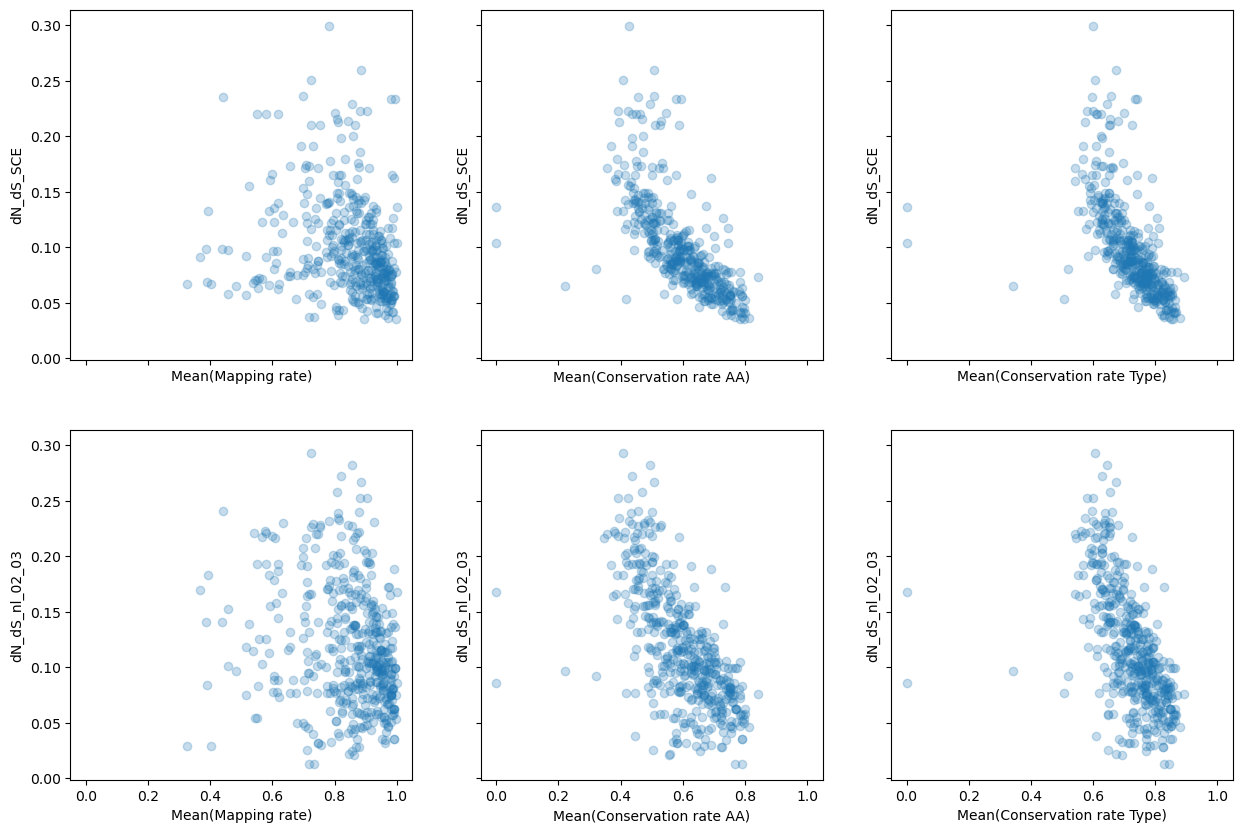

In [212]:
fig, axarr = plt.subplots(2,3, figsize=(15,10), sharex=True, sharey = True)
dnds_cols = [ 'dN_dS_SCE', 'dN_dS_nl_02_03']

for jj, dnds_col in enumerate(dnds_cols):
    for kk, param_to_plot in enumerate(params_to_plot):
        ax = axarr[jj][kk]
        ax.scatter(struct_data_to_plot_df[param_to_plot], struct_data_to_plot_df[dnds_col], alpha = 0.25)
        ax.set_ylabel(dnds_col)
        ax.set_xlabel(param_to_plot)



In [213]:
#struct_data_to_plot_df[(struct_data_to_plot_df['Mean(Conservation rate AA)']<0.5)&(struct_data_to_plot_df['dN_dS_SCE']<0.15)]

In [214]:
#struct_data_to_plot_df[(struct_data_to_plot_df['Mean(Conservation rate AA)']<0.5)&(struct_data_to_plot_df['dN_dS_SCE']>0.20)]

In [218]:
# #Pick OGs that have higher dN/dS
# #4150, 2603, 
# #and lower: 
# #3677, 2845 
selected_og_refs = ['OG4150_REF_Scer_AF-P07256-F1-model_v2', 'OG2603_REF_Scer_AF-P50076-F1-model_v2', 'OG2845_REF_Scer_AF-P43577-F1-model_v2', 'OG3677_REF_Scer_AF-P47125-F1-model_v2', 'OG1299_REF_Scer_AF-P00549-F1-model_v2']
selected_ogs = [og_ref.split('_')[0] for og_ref in selected_og_refs]
struct_data_to_plot_df[struct_data_to_plot_df['og'].isin(selected_ogs)]

,og,og_ref,Mean(Mapping rate),Mean(Conservation rate AA),Mean(Conservation rate Type),OG_SCE,dN_dS_SCE,OG_nl_02_03,dN_dS_nl_02_03
13,OG1299,OG1299_REF_Scer_AF-P00549-F1-model_v2,0.974529,0.735859,0.828039,OG1299.out_yn00,0.0796,OG1299.out_yn00,0.1723
64,OG4150,OG4150_REF_Scer_AF-P07256-F1-model_v2,0.855788,0.494113,0.646492,OG4150.out_yn00,0.2287,OG4150.out_yn00,0.2826
374,OG2845,OG2845_REF_Scer_AF-P43577-F1-model_v2,0.897537,0.488116,0.615662,OG2845.out_yn00,0.1453,OG2845.out_yn00,0.1342
388,OG3677,OG3677_REF_Scer_AF-P47125-F1-model_v2,0.821292,0.494179,0.641265,OG3677.out_yn00,0.0904,OG3677.out_yn00,0.1178
405,OG2603,OG2603_REF_Scer_AF-P50076-F1-model_v2,0.806508,0.467627,0.656083,OG2603.out_yn00,0.2158,OG2603.out_yn00,0.2577
413,OG1299,OG1299_REF_Scer_AF-P52489-F1-model_v2,0.971635,0.637307,0.763982,OG1299.out_yn00,0.0796,OG1299.out_yn00,0.1723


Used Singularity Environment to prepare alignments 
    diverse_yeast/20221206_struct_align_dnds_preps.sh

Used Singularity Environment to generate yn00 files
    diverse_yeast/20221207_run_yn00.sh

In [216]:
tm_align_cluster_list = []
for fname in os.listdir(base_dir+os.sep+os.path.normpath('msas/structural/tm_align/fasta_renamed')): 
    tm_align_cluster_list.append(fname.split('.')[0])

tm_align_post_trim_filter_list = [] #list of og_ref names that survive the filter for 
for fname in os.listdir(base_dir+os.sep+os.path.normpath('msas/structural/tm_align/cds_aln')): 
    tm_align_post_trim_filter_list.append(fname.split('.')[0])

print('OGs filtered out whose strict trimming is too short. If the strict trimming MSA length is less than .25 * median sequence length, the OG is removed.') 

print(set(tm_align_cluster_list) - set(tm_align_post_trim_filter_list))

# yn00_out_og_reflist = []
# for dirname in os.listdir(base_dir+os.sep+os.path.normpath('selection_calculations/yn00')): 
#     if len(dirname.split('_'))==5:
#         yn00_out_og_reflist.append(dirname)
        
        
#OG1306: Had zero length strictly trimmed sequence ')
#OG2147: Had strictly trimmed sequence length of around 240, but each protein was 1000 residues or more.  
#OG1746: Had strictly trimmed sequence length of 53, but each protein was round 250 residues


OGs filtered out whose strict trimming is too short. If the strict trimming MSA length is less than .25 * median sequence length, the OG is removed.
{'OG4755_kluyveromyces_marxianus__OG4755__51_759', 'OG2147_REF_Scer_AF-P39692-F1-model_v2', 'OG6598_kluyveromyces_marxianus__OG6598__51_2377', 'OG7818_lachancea_thermotolerans__OG7818__64_3371', 'OG6574_kluyveromyces_marxianus__OG6574__51_629', 'OG6290_vanderwaltozyma_polyspora__OG6290__136_4191', 'OG1468_lachancea_thermotolerans__OG1468__64_3772', 'OG1746_REF_Scer_AF-P32642-F1-model_v2', 'OG3581_cyberlindnera_jadinii__OG3581__35_1328', 'OG1306_REF_Scer_AF-P38298-F1-model_v2', 'OG2228_candida_tropicalis__OG2228__30_4758', 'OG1111_pachysolen_tannophilus__OG1111__106_1948', 'OG1380_REF_Scer_AF-Q07732-F1-model_v2', 'OG5006_kluyveromyces_marxianus__OG5006__51_4218', 'OG6065_kluyveromyces_marxianus__OG6065__51_1934', 'OG5722_geotrichum_candidum__OG5722__43_1771', 'OG2228_geotrichum_candidum__OG2228__43_6293', 'OG5438_kluyveromyces_marxianus__OG

In [12]:
selected_ogs_dict = {og_ref.split('_')[0]:og_ref for og_ref in tm_align_post_trim_filter_list}
struct_data_dnds = struct_data_to_plot_df[struct_data_to_plot_df['og'].isin(selected_ogs_dict.keys())].copy()

dN_dS_struct = []
dN_struct = []
dS_struct = []
og_list = []
og_ref_list = []

for og_ref in tm_align_post_trim_filter_list:
    og = og_ref.split('_')[0]
    og_ref_list.append(og_ref)
    og_list.append(og)
    #print(og_ref)
    yn00_dir = base_dir + os.sep + os.path.normpath('selection_calculations/yn00/' + og_ref) + os.sep
    output_file = yn00_dir + 'yn00.csv'
    paml_gene_dn_ds_file = yn00_dir +  'yn00.out'
    (dN_dS, dN, dS) = calMean_dN_dS(paml_gene_dn_ds_file, output_file, method="median dN_dS, dN, dS")
    #print((dN_dS, dN, dS))
    dN_dS_struct.append(dN_dS)
    dN_struct.append(dN)
    dS_struct.append(dS)

struct_data_dnds = pd.DataFrame.from_dict({'dN_dS_struct': dN_dS_struct, 'dN_struct': dN_struct, 'dS_struct': dS_struct, 'og': og_list, 'og_ref': og_ref_list})
struct_data_dnds = struct_data_to_plot_df.merge(struct_data_dnds, how='outer', on='og_ref')
struct_data_dnds.to_csv(base_dir + os.sep + os.path.normpath('selection_calculations/yn00/yn00_struct_neilsen.csv'))

C:\Users\heineib\Anaconda3\envs\sc_seq_py\lib\site-packages\ipykernel_launcher.py:29: UserWarning: No dS values pass filters (min_ds = 0.005, max_ds = 3.0) for G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\selection_calculations\yn00\OG2129_REF_Scer_AF-P06785-F1-model_v2\yn00.out
C:\Users\heineib\Anaconda3\envs\sc_seq_py\lib\site-packages\numpy\core\fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\heineib\Anaconda3\envs\sc_seq_py\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\heineib\Anaconda3\envs\sc_seq_py\lib\site-packages\ipykernel_launcher.py:29: UserWarning: No dS values pass filters (min_ds = 0.005, max_ds = 3.0) for G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\selection_calculations\yn00\OG1785_REF_Scer_AF-P25578-F1-model_v2\yn00.out
C:\Users\heineib\Anaconda3\envs\sc_seq_py\lib\site-packages\numpy\core\fromnumeric.

Trouble OG:

dNdS > 50 (filtered that value out and calculated with rest)
    OG1115_REF_Scer_AF-P06208-F1-model_v2
    OG1364_REF_Scer_AF-P27796-F1-model_v2

Don't have value: 
    No DS values passed the DS filter (between 0.005, above 3.0): 
        OG2129_REF_Scer_AF-P06785-F1-model_v2
        OG1785_REF_Scer_AF-P25578-F1-model_v2
        OG1394_REF_Scer_AF-Q12069-F1-model_v2
        OG1329_REF_Scer_AF-P17709-F1-model_v2
        OG1603_REF_Scer_AF-P16120-F1-model_v2
        OG3767_REF_Scer_AF-P39683-F1-model_v2
        OG2677_REF_Scer_AF-P28834-F1-model_v2
        OG1060_REF_Scer_AF-P06169-F1-model_v2
        OG1060_REF_Scer_AF-P50873-F1-model_v2
        OG2357_REF_Scer_AF-P33734-F1-model_v2
        OG2348_REF_Scer_AF-Q06625-F1-model_v2
        OG2214_REF_Scer_AF-P13259-F1-model_v2
        OG1473_REF_Scer_AF-P53204-F1-model_v2
        OG1021_REF_Scer_AF-P40047-F1-model_v2
        OG1659_REF_Scer_AF-P32775-F1-model_v2
        OG1622_REF_Scer_AF-P15274-F1-model_v2
        OG1714_REF_Scer_AF-P07702-F1-model_v2
        OG2588_REF_Scer_AF-P38063-F1-model_v2

    yn00 did not run (like OG2645 below, before switching the Pombe sequences) likely because of mismatch between CDS and protein sequence in one of the sequences): 
        OG1054_REF_Scer_AF-P16861-F1-model_v2  komagataella_pastoris__OG1054__52_3574.pdb	OG1054_25
        OG2960_REF_Scer_AF-P16622-F1-model_v2  Spom_AF-O59786-F1-model_v2.pdb	OG2960_2



OG2645 error: 
    Stop codon in seq OG2645_2 (Spom_AF-O74827-F1-model_v2.pdb


The CDS is not mapping to the protein sequence: 
CDS Mapps to SPBC337.16: https://www.pombase.org/gene/SPBC337.16

Protein sequence should be: 

>SPBC337.16.1:pep cho1|phosphatidyl-N-dimethylethanolamine N-methyltransferase
MAIFEINNSFLICAVSIALNPLLWNIAARSEYNHKTLTKLANGDSKKACYMLAACIFVAG
IVRDLIYQNALKQQPTLGIFMNPLVQGIAKLIFCFGSVLVLSSMYKLGLVGTYLGDYFGF
LLPERVSGFPFNVNDNPMYNGSTLCFLSTALRYGKVAGLLLTLEVFFVYRIALKFEEPFT
AKIYAARDSKQAKKSE*

In Nir's sequence there was: 

>Spom_AF-O74827-F1-model_v2.pdb	L=221	d0=5.52	seqID=0.451	TM-score=0.85202
M-------------------------SLILYPKPTSYLYQPFIKAYFS----------------------------------------------------LN-MAIFEI-N---------NSFLICAVSIALNPLLWNIAARSEYNHKTLTKLANGDSKKACYMLAACIFVAGIVRD-------------------LIYQNA-LKQQPT-LGIFM---NPLV-QGIAKLIFCFGSVLVLSSMYKLGLVGTYLGDYFGFLLPERVSGFPFNVNDNPMYNGSTLCFLSTALRYGKVAGLLLTLEVFFVYRIALKFEEPFTAKIYAARDSKQAKK--------------------------------S--E----------------------------------------------------------------------------------------------------------------------

Which looks like it starts with a different M

That is what is present in Uniprot: 
MSLILYPKPTSYLYQPFIKAYFSLNMAIFEINNSFLICAVSIALNPLLWNIAARSEYNHKTLTKLANGDSKKACYMLAACIFVAGIVRDLIYQNALKQQPTLGIFMNPLVQGIAKLIFCFGSVLVLSSMYKLGLVGTYLGDYFGFLLPERVSGFPFNVNDNPMYNGSTLCFLSTALRYGKVAGLLLTLEVFFVYRIALKFEEPFTAKIYAARDSKQAKKSE

https://www.uniprot.org/uniprotkb/O74827/entry#sequences


The following had a * in the name after a tab: 
>ascoidea_rubescens__OG2645__6_4396.pdb	L=217	d0=5.48	seqID=0.549	TM-score=0.92699
I removed that

After changing coding sequence import for S. pombe to uniprot (as opposed to pombase), ran again and now OG2960 had a problem.  The protein sequence in alphafold matched more closely to the Pombase sequence!!

Current Solution
    Remove problem OGs from alignments. 

Ideal solution: 
    Identify and flag problem proteins
    Remove problem proteins from alignments / Manually repair problem alignments
    Recalculate

In [13]:
struct_data_dnds

,og_x,og_ref,Mean(Mapping rate),Mean(Conservation rate AA),Mean(Conservation rate Type),OG_SCE,dN_dS_SCE,OG_nl_02_03,dN_dS_nl_02_03,dN_dS_struct,dN_struct,dS_struct,og_y
0,OG4352,OG4352_REF_Scer_AF-P00127-F1-model_v2,0.515006,0.488312,0.583829,OG4352.out_yn00,0.0924,OG4352.out_yn00,0.11860,0.1301,0.30970,2.7347,OG4352
1,OG3208,OG3208_REF_Scer_AF-P00128-F1-model_v2,0.983085,0.577829,0.742639,OG3208.out_yn00,0.1655,OG3208.out_yn00,0.14910,0.2197,0.40350,1.8272,OG3208
2,OG1016,OG1016_REF_Scer_AF-P00330-F1-model_v2,0.954863,0.736954,0.817145,NaN,NaN,NaN,NaN,0.1130,0.19800,1.7722,OG1016
3,OG1016,OG1016_REF_Scer_AF-P00331-F1-model_v2,0.938285,0.737345,0.817970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OG1145,OG1145_REF_Scer_AF-P00358-F1-model_v2,0.994326,0.769694,0.856194,NaN,NaN,OG1145.out_yn00,0.09955,0.1600,0.18535,1.2456,OG1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,NaN,OG6290_eremothecium_gossypii__OG6290__40_1372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG6290
546,NaN,OG6574_eremothecium_gossypii__OG6574__40_137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2330,0.45360,1.9462,OG6574
547,NaN,OG6598_kazachstania_naganishii__OG6598__49_1006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG6598
548,NaN,OG7278_kazachstania_naganishii__OG7278__49_2415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3026,0.67650,2.0996,OG7278


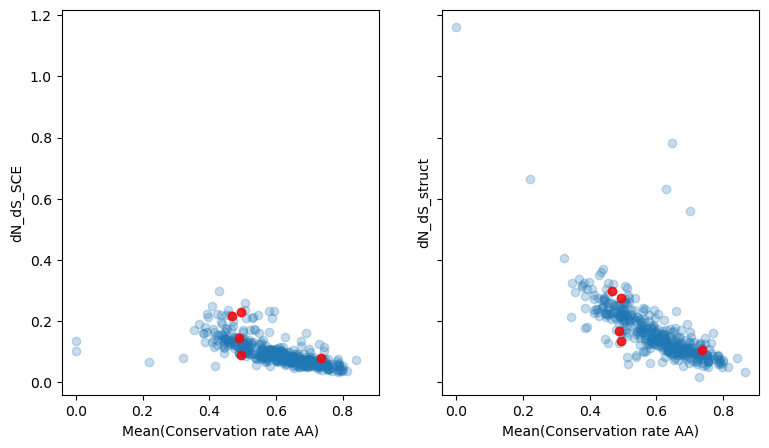

In [219]:
#Plot dN/dS for structural vs Neilsen

struct_data_dnds = pd.read_csv(base_dir + os.sep + os.path.normpath('selection_calculations/yn00/yn00_struct_neilsen.csv'))

fig, axarr = plt.subplots(1,2, figsize=(9,5), sharex=True, sharey = True)
dnds_seq_cols = [ 'dN_dS_SCE', 'dN_dS_struct']

for jj, dnds_seq_col in enumerate(dnds_seq_cols):   
    ax = axarr[jj]
    ax.scatter(struct_data_dnds['Mean(Conservation rate AA)'], struct_data_dnds[dnds_seq_col], alpha = 0.25)
    ax.set_ylabel(dnds_seq_col)
    ax.set_xlabel('Mean(Conservation rate AA)')
    
    struct_data_dnds_subset = struct_data_dnds[struct_data_dnds['og_ref'].isin(selected_og_refs)]
    
    ax.scatter(struct_data_dnds_subset['Mean(Conservation rate AA)'], struct_data_dnds_subset[dnds_seq_col],color='r' ,alpha = 0.8)
    ax.set_ylabel(dnds_seq_col)
    ax.set_xlabel('Mean(Conservation rate AA)')
    

Analysis of outlier groups: 

In [18]:
struct_data_dnds[struct_data_dnds['dN_dS_struct']>0.35]

,Unnamed: 0,og_x,og_ref,Mean(Mapping rate),Mean(Conservation rate AA),Mean(Conservation rate Type),OG_SCE,dN_dS_SCE,OG_nl_02_03,dN_dS_nl_02_03,dN_dS_struct,dN_struct,dS_struct,og_y
51,51,OG1115,OG1115_REF_Scer_AF-P06208-F1-model_v2,0.816146,0.699453,0.792947,NaN,NaN,OG1115.out_yn00,0.07050,0.56150,0.50180,0.91650,OG1115
175,175,OG1640,OG1640_REF_Scer_AF-P23501-F1-model_v2,0.777894,0.438573,0.628229,OG1640.out_yn00,0.1396,OG1640.out_yn00,0.17035,0.37080,0.71020,1.89560,OG1640
188,188,OG1603,OG1603_REF_Scer_AF-P25632-F1-model_v2,0.483782,0.219630,0.341672,OG1603.out_yn00,0.0652,OG1603.out_yn00,0.09690,0.66540,1.70570,2.56350,OG1603
195,195,OG1364,OG1364_REF_Scer_AF-P27796-F1-model_v2,0.875985,0.627606,0.745329,OG1364.out_yn00,0.0892,OG1364.out_yn00,0.10130,0.63280,0.54450,0.89970,OG1364
203,203,OG1230,OG1230_REF_Scer_AF-P29465-F1-model_v2,0.656116,0.647399,0.771185,OG1230.out_yn00,0.0741,OG1230.out_yn00,0.07645,0.78170,1.83330,2.33980,OG1230
289,289,OG3242,OG3242_REF_Scer_AF-P38179-F1-model_v2,0.810937,0.434906,0.639977,OG3242.out_yn00,0.1586,OG3242.out_yn00,0.23930,0.36230,0.75585,1.96445,OG3242
293,293,OG4312,OG4312_REF_Scer_AF-P38280-F1-model_v2,1.000000,0.000000,0.000000,OG4312.out_yn00,0.1359,OG4312.out_yn00,0.16775,1.16070,2.22240,1.91470,OG4312
347,347,OG1254,OG1254_REF_Scer_AF-P40395-F1-model_v2,0.606233,0.322243,0.520691,OG1254.out_yn00,0.0807,OG1254.out_yn00,0.09200,0.40765,0.77905,2.04350,OG1254
542,542,NaN,OG5722_alloascoidea_hylecoeti__OG5722__0_1167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48000,0.90770,1.86915,OG5722


In [ ]:
Has paralogs: 
    OG1115 (had dS > 50 )
    OG1603 (its paralog OG1603_REF_Scer_AF-P16120-F1-model_v2 failed dS filter)  #Check to see if I included the C0 clusters .  This one has a Pombe and a Sc cluster
    OG1640


No paralogs 
OG1364 (had dS > 50)
OG1230 
OG3242 (fairly high in both) 

In [16]:
struct_data_dnds[struct_data_dnds['og_x'].isin(struct_data_dnds[struct_data_dnds['dN_dS_struct']>0.35]['og_x'])]

,Unnamed: 0,og_x,og_ref,Mean(Mapping rate),Mean(Conservation rate AA),Mean(Conservation rate Type),OG_SCE,dN_dS_SCE,OG_nl_02_03,dN_dS_nl_02_03,dN_dS_struct,dN_struct,dS_struct,og_y
51,51,OG1115,OG1115_REF_Scer_AF-P06208-F1-model_v2,0.816146,0.699453,0.792947,NaN,NaN,OG1115.out_yn00,0.07050,0.56150,0.50180,0.91650,OG1115
136,136,OG1603,OG1603_REF_Scer_AF-P16120-F1-model_v2,0.953019,0.673427,0.777066,OG1603.out_yn00,0.0652,OG1603.out_yn00,0.09690,NaN,NaN,NaN,OG1603
175,175,OG1640,OG1640_REF_Scer_AF-P23501-F1-model_v2,0.777894,0.438573,0.628229,OG1640.out_yn00,0.1396,OG1640.out_yn00,0.17035,0.37080,0.71020,1.89560,OG1640
188,188,OG1603,OG1603_REF_Scer_AF-P25632-F1-model_v2,0.483782,0.219630,0.341672,OG1603.out_yn00,0.0652,OG1603.out_yn00,0.09690,0.66540,1.70570,2.56350,OG1603
195,195,OG1364,OG1364_REF_Scer_AF-P27796-F1-model_v2,0.875985,0.627606,0.745329,OG1364.out_yn00,0.0892,OG1364.out_yn00,0.10130,0.63280,0.54450,0.89970,OG1364
203,203,OG1230,OG1230_REF_Scer_AF-P29465-F1-model_v2,0.656116,0.647399,0.771185,OG1230.out_yn00,0.0741,OG1230.out_yn00,0.07645,0.78170,1.83330,2.33980,OG1230
284,284,OG4312,OG4312_REF_Scer_AF-P38115-F1-model_v2,0.845155,0.490588,0.637199,OG4312.out_yn00,0.1359,OG4312.out_yn00,0.16775,0.25230,0.64240,2.69140,OG4312
289,289,OG3242,OG3242_REF_Scer_AF-P38179-F1-model_v2,0.810937,0.434906,0.639977,OG3242.out_yn00,0.1586,OG3242.out_yn00,0.23930,0.36230,0.75585,1.96445,OG3242
293,293,OG4312,OG4312_REF_Scer_AF-P38280-F1-model_v2,1.000000,0.000000,0.000000,OG4312.out_yn00,0.1359,OG4312.out_yn00,0.16775,1.16070,2.22240,1.91470,OG4312
347,347,OG1254,OG1254_REF_Scer_AF-P40395-F1-model_v2,0.606233,0.322243,0.520691,OG1254.out_yn00,0.0807,OG1254.out_yn00,0.09200,0.40765,0.77905,2.04350,OG1254


In [3]:
selected_og_refs = ['OG4150_REF_Scer_AF-P07256-F1-model_v2', 'OG2603_REF_Scer_AF-P50076-F1-model_v2', 'OG2845_REF_Scer_AF-P43577-F1-model_v2', 'OG3677_REF_Scer_AF-P47125-F1-model_v2', 'OG1299_REF_Scer_AF-P00549-F1-model_v2']
selected_ogs = [og_ref.split('_')[0] for og_ref in selected_og_refs]
struct_data_dnds[struct_data_dnds['og_x'].isin(selected_ogs)]

,Unnamed: 0,Unnamed: 0.1,og_x,og_ref,Mean(Mapping rate),Mean(Conservation rate AA),Mean(Conservation rate Type),OG_SCE,dN_dS_SCE,OG_nl_02_03,...,dN_dS_struct,dN_struct,dS_struct,og_y,og,tree_length,kappa,dN_dS_struct_m0,tree_length_dS,tree_length_dS.1
13,13,13,OG1299,OG1299_REF_Scer_AF-P00549-F1-model_v2,0.974529,0.735859,0.828039,OG1299.out_yn00,0.0796,OG1299.out_yn00,...,0.1063,0.15790,1.49275,OG1299,OG1299,35.541141,1.33863,0.08320,3.1528,37.8925
64,64,64,OG4150,OG4150_REF_Scer_AF-P07256-F1-model_v2,0.855788,0.494113,0.646492,OG4150.out_yn00,0.2287,OG4150.out_yn00,...,0.2764,0.54320,1.81100,OG4150,OG4150,40.471574,1.15876,0.13195,5.0681,38.4103
374,374,374,OG2845,OG2845_REF_Scer_AF-P43577-F1-model_v2,0.897537,0.488116,0.615662,OG2845.out_yn00,0.1453,OG2845.out_yn00,...,0.1672,0.34990,2.31910,OG2845,OG2845,96.299127,1.33293,0.04244,5.0509,119.0216
388,388,388,OG3677,OG3677_REF_Scer_AF-P47125-F1-model_v2,0.821292,0.494179,0.641265,OG3677.out_yn00,0.0904,OG3677.out_yn00,...,0.1337,0.36390,2.56720,OG3677,OG3677,68.645225,1.30534,0.04969,4.0479,81.4599
405,405,405,OG2603,OG2603_REF_Scer_AF-P50076-F1-model_v2,0.806508,0.467627,0.656083,OG2603.out_yn00,0.2158,OG2603.out_yn00,...,0.2975,0.65965,2.11475,OG2603,OG2603,152.847089,1.53130,0.03992,6.9458,173.9918
413,413,413,OG1299,OG1299_REF_Scer_AF-P52489-F1-model_v2,0.971635,0.637307,0.763982,OG1299.out_yn00,0.0796,OG1299.out_yn00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


M0 Selection calculations for each orthogroup

In [221]:
# tm_align_cluster_list = []
# for fname in os.listdir(base_dir+os.sep+os.path.normpath('msas/structural/tm_align/fasta_renamed')): 
#     tm_align_cluster_list.append(fname.split('.')[0])

# tm_align_post_trim_filter_list = [] #list of og_ref names that survive the filter for 
# for fname in os.listdir(base_dir+os.sep+os.path.normpath('msas/structural/tm_align/cds_aln')): 
#     tm_align_post_trim_filter_list.append(fname.split('.')[0])

# print('OGs filtered out whose strict trimming is too short. If the strict trimming MSA length is less than .25 * median sequence length, the OG is removed.') 

# print(set(tm_align_cluster_list) - set(tm_align_post_trim_filter_list))

#selected_ogs_dict = {og_ref.split('_')[0]:og_ref for og_ref in tm_align_post_trim_filter_list}
#struct_data_dnds = struct_data_to_plot_df[struct_data_to_plot_df['og'].isin(selected_ogs_dict.keys())].copy()

#dN_dS_struct = []
#dN_struct = []
#dS_struct = []


m0_base =  base_dir + os.sep + os.path.normpath('selection_calculations/m0/') + os.sep


og_list = []
og_ref_list = []
m0_data_out = {}

for og_ref in next(os.walk(m0_base))[1]:    #next(os.walk(m0_base))[0] gets just directories - https://stackoverflow.com/questions/141291/how-to-list-only-top-level-directories-in-python
    #for og_ref in tm_align_post_trim_filter_list:
    #og_ref = 'OG1299_REF_Scer_AF-P00549-F1-model_v2'
    og = og_ref.split('_')[0]
    og_ref_list.append(og_ref)
    og_list.append(og)
    #print(og_ref)
    m0_dir = m0_base + og_ref + os.sep
    output_file = m0_dir + 'm0.csv'
    paml_gene_dn_ds_file = m0_dir +  'm0.out'
    
    tree_length = None
    kappa = None
    dn_ds = None
    tree_length_dN = None
    tree_length_dS=None

    with open(paml_gene_dn_ds_file, 'r') as m0_out_data: 
        for line in m0_out_data:
            if 'tree length =' in line: 
                tree_length = float(line.split('=')[1].strip())
                break

        for line in m0_out_data:
            if 'kappa' in line: 
                kappa = float(line.split('=')[1].strip())
                break

        for line in m0_out_data:
            if 'omega' in line: 
                dN_dS = float(line.split('=')[1].strip())
                break

        for line in m0_out_data:
            if 'tree length for dN:' in line: 
                tree_length_dN = float(line.split(':')[1].strip())
                break

        for line in m0_out_data:
            if 'tree length for dS:' in line: 
                tree_length_dS = float(line.split(':')[1].strip())
                break
    
    if tree_length==None:
        print('tree_length not found for ' + og_ref)
    m0_data_out[og_ref] = (og, tree_length, kappa, dN_dS, tree_length_dN, tree_length_dS)
    

    
m0_data_df = pd.DataFrame.from_dict(m0_data_out, orient='index', columns = ['og', 'tree_length', 'kappa', 'dN_dS_struct_m0', 'tree_length_dN', 'tree_length_dS'])
struct_data_dnds_m0 = struct_data_dnds.merge(m0_data_df, how='outer', left_on='og_ref', right_index=True)
struct_data_dnds_m0.to_csv(base_dir + os.sep + os.path.normpath('selection_calculations/m0/m0_struct_neilsen_yn00.csv'))


tree_length not found for OG2282_REF_Scer_AF-P49435-F1-model_v2
tree_length not found for OG1193_REF_Scer_AF-P00924-F1-model_v2
tree_length not found for OG4185_REF_Scer_AF-P0CX77-F1-model_v2


NameError: name 'selected_og_refs' is not defined

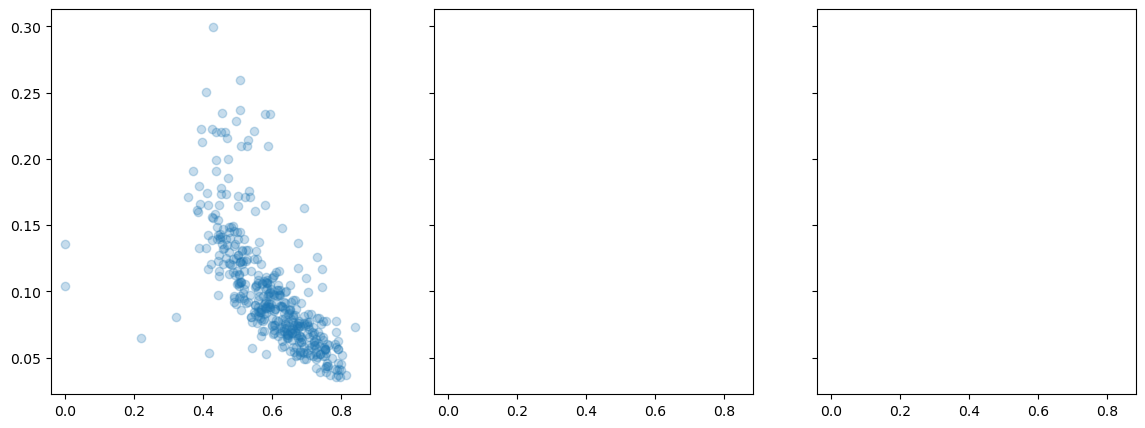

In [46]:
#Plot dN/dS for structural vs Neilsen

struct_data_dnds = pd.read_csv(base_dir + os.sep + os.path.normpath('selection_calculations/m0/m0_struct_neilsen_yn00.csv'))

fig, axarr = plt.subplots(1,3, figsize=(14,5), sharex=True, sharey = True)
dnds_seq_cols = [ 'dN_dS_SCE', 'dN_dS_struct', 'dN_dS_struct_m0']

for jj, dnds_seq_col in enumerate(dnds_seq_cols):   
    ax = axarr[jj]
    ax.scatter(struct_data_dnds['Mean(Conservation rate AA)'], struct_data_dnds[dnds_seq_col], alpha = 0.25)
   
    struct_data_dnds_subset = struct_data_dnds[struct_data_dnds['og_ref'].isin(selected_og_refs)]
    
    ax.scatter(struct_data_dnds_subset['Mean(Conservation rate AA)'], struct_data_dnds_subset[dnds_seq_col],color='r' ,alpha = 0.8)
    ax.set_ylabel(dnds_seq_col)
    ax.set_xlabel('Mean(Conservation rate AA)')

Text(0.5, 0, 'Mean(Conservation rate AA)')

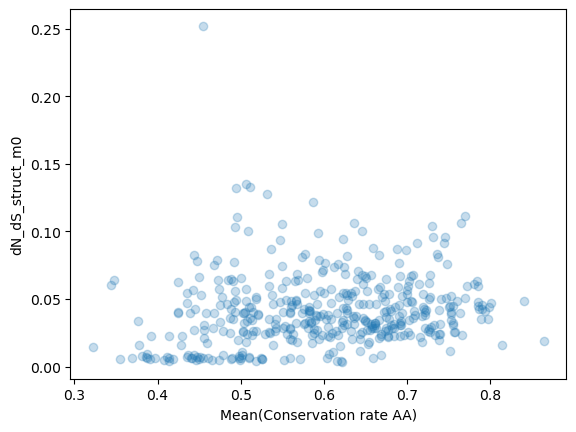

In [48]:
fig, ax = plt.subplots(1,1)

ax.scatter(struct_data_dnds['Mean(Conservation rate AA)'], struct_data_dnds['dN_dS_struct_m0'], alpha = 0.25)

#struct_data_dnds_subset = struct_data_dnds[struct_data_dnds['og_ref'].isin(selected_og_refs)]
#ax.scatter(struct_data_dnds_subset['Mean(Conservation rate AA)'], struct_data_dnds_subset['dN_dS_struct_m0'],color='r' ,alpha = 0.8)
ax.set_ylabel('dN_dS_struct_m0')
ax.set_xlabel('Mean(Conservation rate AA)')

Text(0.5, 0, 'Mean(Conservation rate AA)')

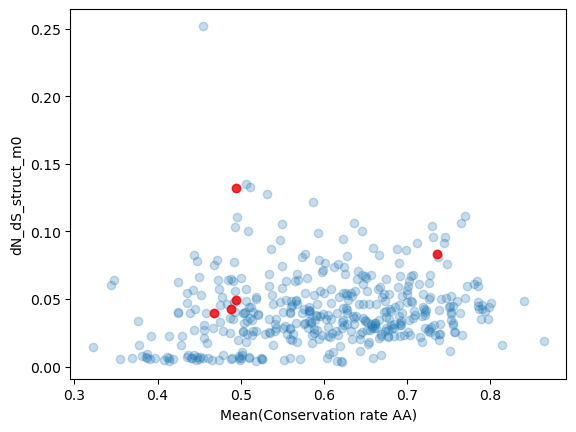

In [223]:
fig, ax = plt.subplots(1,1)

ax.scatter(struct_data_dnds['Mean(Conservation rate AA)'], struct_data_dnds['dN_dS_struct_m0'], alpha = 0.25)

struct_data_dnds_subset = struct_data_dnds[struct_data_dnds['og_ref'].isin(selected_og_refs)]

ax.scatter(struct_data_dnds_subset['Mean(Conservation rate AA)'], struct_data_dnds_subset['dN_dS_struct_m0'],color='r' ,alpha = 0.8)
ax.set_ylabel('dN_dS_struct_m0')
ax.set_xlabel('Mean(Conservation rate AA)')

In [41]:
struct_data_dnds.sort_values(by='dN_dS_struct_m0')

,Unnamed: 0,Unnamed: 0.1,og_x,og_ref,Mean(Mapping rate),Mean(Conservation rate AA),Mean(Conservation rate Type),OG_SCE,dN_dS_SCE,OG_nl_02_03,...,dN_dS_struct,dN_struct,dS_struct,og_y,og,tree_length,kappa,dN_dS_struct_m0,tree_length_dS,tree_length_dS.1
266,266,266,OG3008,OG3008_REF_Scer_AF-P36076-F1-model_v2,0.391014,0.621655,0.765640,OG3008.out_yn00,0.0688,OG3008.out_yn00,...,0.14165,0.30875,2.18665,OG3008,OG3008,702.694735,1.36836,0.00354,3.3044,933.2096
378,378,378,OG2999,OG2999_REF_Scer_AF-P43636-F1-model_v2,0.795070,0.518443,0.663924,OG2999.out_yn00,0.1017,OG2999.out_yn00,...,0.20500,0.49610,2.46400,OG2999,OG2999,1037.138851,1.53711,0.00391,5.4388,1392.2430
517,517,517,OG1764,OG1764_REF_Scer_AF-Q12189-F1-model_v2,0.916595,0.620356,0.736102,OG1764.out_yn00,0.0978,OG1764.out_yn00,...,0.15965,0.34705,2.11815,OG1764,OG1764,848.177639,1.40233,0.00416,4.4265,1064.9058
354,354,354,OG1933,OG1933_REF_Scer_AF-P40545-F1-model_v2,0.920130,0.615480,0.724607,OG1933.out_yn00,0.1045,OG1933.out_yn00,...,0.15670,0.35105,2.45255,OG1933,OG1933,697.590301,1.33537,0.00434,4.1879,965.1963
304,304,304,OG3018,OG3018_REF_Scer_AF-P38635-F1-model_v2,0.877038,0.413258,0.588927,OG3018.out_yn00,0.1424,OG3018.out_yn00,...,0.27300,0.62865,2.30075,OG3018,OG3018,1064.056007,1.58679,0.00435,6.3933,1470.2429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,545,545,NaN,OG6290_eremothecium_gossypii__OG6290__40_1372,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OG6290,NaN,NaN,NaN,NaN,NaN,NaN
546,546,546,NaN,OG6574_eremothecium_gossypii__OG6574__40_137,NaN,NaN,NaN,NaN,NaN,NaN,...,0.23300,0.45360,1.94620,OG6574,NaN,NaN,NaN,NaN,NaN,NaN
547,547,547,NaN,OG6598_kazachstania_naganishii__OG6598__49_1006,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,OG6598,NaN,NaN,NaN,NaN,NaN,NaN
548,548,548,NaN,OG7278_kazachstania_naganishii__OG7278__49_2415,NaN,NaN,NaN,NaN,NaN,NaN,...,0.30260,0.67650,2.09960,OG7278,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
struct_data_dnds[(struct_data_dnds['dN_dS_struct_m0']>0.09)&(struct_data_dnds['Mean(Conservation rate AA)']<0.6)].sort_values(by='dN_dS_struct_m0', ascending=False).loc[:,['og_ref','og','dN_dS_struct_m0', 'Mean(Conservation rate AA)']]

,og_ref,og,dN_dS_struct_m0,Mean(Conservation rate AA)
276,OG4552_REF_Scer_AF-P37299-F1-model_v2,OG4552,0.25202,0.455022
247,OG4555_REF_Scer_AF-P32799-F1-model_v2,OG4555,0.13541,0.506526
7,OG4316_REF_Scer_AF-P00424-F1-model_v2,OG4316,0.13305,0.510637
64,OG4150_REF_Scer_AF-P07256-F1-model_v2,OG4150,0.13195,0.494113
105,OG4346_REF_Scer_AF-P10174-F1-model_v2,OG4346,0.12753,0.531120
88,OG4360_REF_Scer_AF-P08525-F1-model_v2,OG4360,0.12166,0.587126
16,OG5441_REF_Scer_AF-P00724-F1-model_v2,OG5441,0.11105,0.495190
419,OG1377_REF_Scer_AF-P53090-F1-model_v2,OG1377,0.10546,0.550098
257,OG2112_REF_Scer_AF-P33421-F1-model_v2,OG2112,0.10336,0.492917
122,OG1122_REF_Scer_AF-P13711-F1-model_v2,OG1122,0.10054,0.508399


In [62]:
list(set(list(etc_proteins_clustered['enzyme'])))

['cytochrome c oxidase',
 'NAD dehydrogenase',
 'succinate dehydrogenase',
 'ubiquinol cytochrome b reductase']

In [67]:
struct_data_dnds[struct_data_dnds['og_ref'].isin(etc_proteins_clustered[etc_proteins_clustered['enzyme']==enzyme]['og_ref'])]

,Unnamed: 0,Unnamed: 0.1,og_x,og_ref,Mean(Mapping rate),Mean(Conservation rate AA),Mean(Conservation rate Type),OG_SCE,dN_dS_SCE,OG_nl_02_03,...,dN_dS_struct,dN_struct,dS_struct,og_y,og,tree_length,kappa,dN_dS_struct_m0,tree_length_dS,tree_length_dS.1
0,0,0,OG4352,OG4352_REF_Scer_AF-P00127-F1-model_v2,0.515006,0.488312,0.583829,OG4352.out_yn00,0.0924,OG4352.out_yn00,...,0.13010,0.3097,2.73470,OG4352,OG4352,33.684114,1.43708,0.06460,2.6508,41.0328
1,1,1,OG3208,OG3208_REF_Scer_AF-P00128-F1-model_v2,0.983085,0.577829,0.742639,OG3208.out_yn00,0.1655,OG3208.out_yn00,...,0.21970,0.4035,1.82720,OG3208,OG3208,54.335382,1.26238,0.08318,4.8548,58.3681
56,56,56,OG2248,OG2248_REF_Scer_AF-P07143-F1-model_v2,0.805705,0.790176,0.862447,OG2248.out_yn00,0.0462,OG2248.out_yn00,...,0.06630,0.1073,1.76920,OG2248,OG2248,36.063606,1.26135,0.04297,1.7977,41.8418
64,64,64,OG4150,OG4150_REF_Scer_AF-P07256-F1-model_v2,0.855788,0.494113,0.646492,OG4150.out_yn00,0.2287,OG4150.out_yn00,...,0.27640,0.5432,1.81100,OG4150,OG4150,40.471574,1.15876,0.13195,5.0681,38.4103
65,65,65,OG2006,OG2006_REF_Scer_AF-P07257-F1-model_v2,0.859501,0.471097,0.626659,OG2006.out_yn00,0.1999,OG2006.out_yn00,...,0.32255,0.6303,1.94075,OG2006,OG2006,85.816195,1.26877,0.07908,6.9683,88.1218
81,81,81,OG3575,OG3575_REF_Scer_AF-P08067-F1-model_v2,0.796899,0.748114,0.826812,OG3575.out_yn00,0.0658,OG3575.out_yn00,...,0.08840,0.1484,1.61560,OG3575,OG3575,24.577237,1.33301,0.07590,2.0340,26.7988
88,88,88,OG4360,OG4360_REF_Scer_AF-P08525-F1-model_v2,0.864742,0.587126,0.725837,OG4360.out_yn00,0.2101,OG4360.out_yn00,...,0.17170,0.3492,2.08780,OG4360,OG4360,28.447028,1.56897,0.12166,3.4444,28.3119
171,171,171,OG4744,OG4744_REF_Scer_AF-P22289-F1-model_v2,0.800866,0.547609,0.698766,OG4744.out_yn00,0.2211,OG4744.out_yn00,...,0.20385,0.3558,1.80320,OG4744,OG4744,81.672935,1.63435,0.09353,8.1023,86.6281
276,276,276,OG4552,OG4552_REF_Scer_AF-P37299-F1-model_v2,0.440031,0.455022,0.598244,OG4552.out_yn00,0.2350,OG4552.out_yn00,...,0.28830,0.5350,1.95820,OG4552,OG4552,24.663009,1.46351,0.25202,4.7162,18.7136


In [66]:
etc_proteins_clustered[etc_proteins_clustered['enzyme']==enzyme]['og_ref']

6     OG2006_REF_Scer_AF-P07257-F1-model_v2
9     OG2248_REF_Scer_AF-P07143-F1-model_v2
12    OG3208_REF_Scer_AF-P00128-F1-model_v2
14    OG3575_REF_Scer_AF-P08067-F1-model_v2
16    OG4150_REF_Scer_AF-P07256-F1-model_v2
20    OG4352_REF_Scer_AF-P00127-F1-model_v2
21    OG4360_REF_Scer_AF-P08525-F1-model_v2
22    OG4552_REF_Scer_AF-P37299-F1-model_v2
24    OG4744_REF_Scer_AF-P22289-F1-model_v2
27                                      NaN
Name: og_ref, dtype: object

In [71]:
ax.legend?

Signature: ax.legend(*args, **kwargs)
Docstring:
Place a legend on the Axes.

Call signatures::

    legend()
    legend(handles, labels)
    legend(handles=handles)
    legend(labels)

The call signatures correspond to the following different ways to use
this method:

**1. Automatic detection of elements to be shown in the legend**

The elements to be added to the legend are automatically determined,
when you do not pass in any extra arguments.

In this case, the labels are taken from the artist. You can specify
them either at artist creation or by calling the
:meth:`~.Artist.set_label` method on the artist::

    ax.plot([1, 2, 3], label='Inline label')
    ax.legend()

or::

    line, = ax.plot([1, 2, 3])
    line.set_label('Label via method')
    ax.legend()

Specific lines can be excluded from the automatic legend element
selection by defining a label starting with an underscore.
This is default for all artists, so calling `.Axes.legend` without
any arguments and without setting t

cytochrome c oxidase
r
NAD dehydrogenase
k
succinate dehydrogenase
#fc03e3
ubiquinol cytochrome b reductase
b


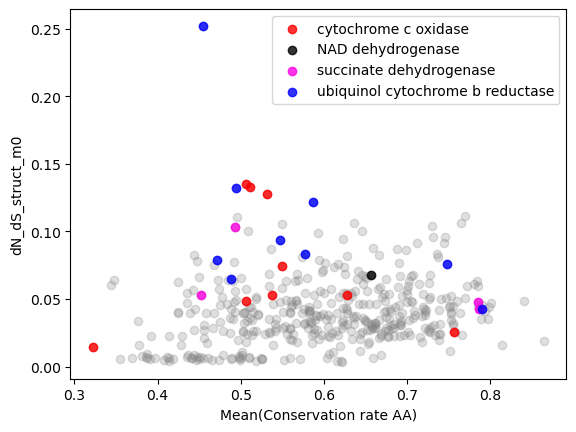

In [73]:
fig, ax = plt.subplots(1,1)

enzymes = {'cytochrome c oxidase': 'r',
           'NAD dehydrogenase': 'k',
           'succinate dehydrogenase': '#fc03e3', 
           'ubiquinol cytochrome b reductase': 'b'
          }

ax.scatter(struct_data_dnds['Mean(Conservation rate AA)'], struct_data_dnds['dN_dS_struct_m0'], alpha = 0.25, c= 'grey')

legend_handles = []
legend_labels = []
for enzyme, color in enzymes.items(): 
    print(enzyme)
    print(color)
    struct_data_dnds_subset = struct_data_dnds[struct_data_dnds['og_ref'].isin(etc_proteins_clustered[etc_proteins_clustered['enzyme']==enzyme]['og_ref'])]
    handle = ax.scatter(struct_data_dnds_subset['Mean(Conservation rate AA)'], struct_data_dnds_subset['dN_dS_struct_m0'],color=color ,alpha = 0.8)
    legend_handles.append(handle)
    legend_labels.append(enzyme)
    
ax.set_ylabel('dN_dS_struct_m0')
ax.set_xlabel('Mean(Conservation rate AA)')
ax.legend(legend_handles, legend_labels)

Text(0.5, 0, 'Mean(Conservation rate AA)')

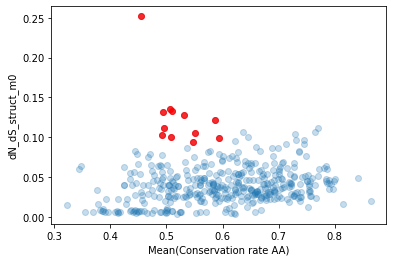

In [40]:
fig, ax = plt.subplots(1,1)

ax.scatter(struct_data_dnds['Mean(Conservation rate AA)'], struct_data_dnds['dN_dS_struct_m0'], alpha = 0.25)

struct_data_dnds_subset = struct_data_dnds[(struct_data_dnds['dN_dS_struct_m0']>0.09)&(struct_data_dnds['Mean(Conservation rate AA)']<0.6)]

ax.scatter(struct_data_dnds_subset['Mean(Conservation rate AA)'], struct_data_dnds_subset['dN_dS_struct_m0'],color='r' ,alpha = 0.8)
ax.set_ylabel('dN_dS_struct_m0')
ax.set_xlabel('Mean(Conservation rate AA)')

In [47]:
struct_data_dnds[(struct_data_dnds['dN_dS_struct_m0']>0.08)&(struct_data_dnds['Mean(Conservation rate AA)']>0.6)].sort_values(by='dN_dS_struct_m0', ascending=False).loc[:,['og_ref','og','dN_dS_struct_m0', 'Mean(Conservation rate AA)']]

,og_ref,og,dN_dS_struct_m0,Mean(Conservation rate AA)
4,OG1145_REF_Scer_AF-P00358-F1-model_v2,OG1145,0.11116,0.769694
22,OG1193_REF_Scer_AF-P00924-F1-model_v2,OG1193,0.10633,0.765119
38,OG1208_REF_Scer_AF-P04806-F1-model_v2,OG1208,0.10633,0.636346
44,OG1813_REF_Scer_AF-P05694-F1-model_v2,OG1813,0.10394,0.729674
11,OG3185_REF_Scer_AF-P00447-F1-model_v2,OG3185,0.10029,0.645687
125,OG1432_REF_Scer_AF-P14540-F1-model_v2,OG1432,0.09617,0.730782
14,OG1424_REF_Scer_AF-P00560-F1-model_v2,OG1424,0.09583,0.745608
173,OG1112_REF_Scer_AF-P23254-F1-model_v2,OG1112,0.09457,0.622696
28,OG2794_REF_Scer_AF-P00950-F1-model_v2,OG2794,0.09144,0.744687
68,OG1892_REF_Scer_AF-P07262-F1-model_v2,OG1892,0.09138,0.712552


Text(0.5, 0, 'Mean(Conservation rate AA)')

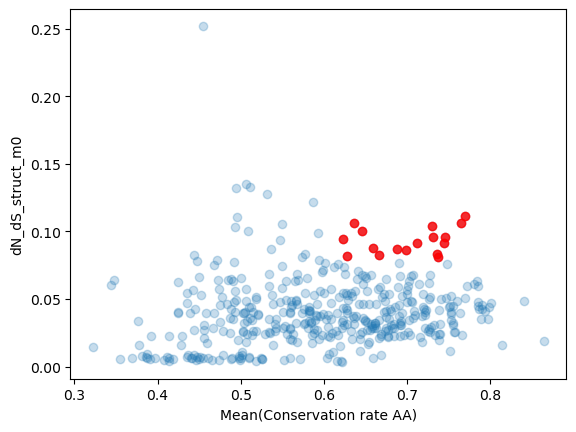

In [47]:
fig, ax = plt.subplots(1,1)

ax.scatter(struct_data_dnds['Mean(Conservation rate AA)'], struct_data_dnds['dN_dS_struct_m0'], alpha = 0.25)

struct_data_dnds_subset = struct_data_dnds[(struct_data_dnds['dN_dS_struct_m0']>0.08)&(struct_data_dnds['Mean(Conservation rate AA)']>0.6)].sort_values(by='dN_dS_struct_m0', ascending=False).loc[:,['og_ref','og','dN_dS_struct_m0', 'Mean(Conservation rate AA)']]

ax.scatter(struct_data_dnds_subset['Mean(Conservation rate AA)'], struct_data_dnds_subset['dN_dS_struct_m0'],color='r' ,alpha = 0.8)
ax.set_ylabel('dN_dS_struct_m0')
ax.set_xlabel('Mean(Conservation rate AA)')

1145: TDH3, TDH1,    
1193: ERR3, ERR2, ENO1, ERR1, ENO2,     
1208: HKX2, HKX1
1813: MET6
OG3185: SOD2
OG1432: FBA1
OG1424: PGK1
OG1112: TKL1, TKL2
OG2794: GPM1
OG1892: GDH1, GDH3


In [62]:
struct_data_dnds[(struct_data_dnds['dN_dS_struct_m0']<0.006)&(struct_data_dnds['Mean(Conservation rate AA)']<0.6)].sort_values(by='dN_dS_struct_m0', ascending=False).loc[:,['og_ref','og','dN_dS_struct_m0', 'Mean(Conservation rate AA)']]

,og_ref,og,dN_dS_struct_m0,Mean(Conservation rate AA)
272,OG2262_REF_Scer_AF-P37254-F1-model_v2,OG2262,0.00599,0.488731
84,OG3445_REF_Scer_AF-P08432-F1-model_v2,OG3445,0.00593,0.571035
417,OG2228_REF_Scer_AF-P53037-F1-model_v2,OG2228,0.00572,0.525051
511,OG3679_REF_Scer_AF-Q12051-F1-model_v2,OG3679,0.00565,0.449906
73,OG3065_REF_Scer_AF-P07285-F1-model_v2,OG3065,0.00549,0.525262
239,OG1168_REF_Scer_AF-P32528-F1-model_v2,OG1168,0.00543,0.390285
292,OG4021_REF_Scer_AF-P38242-F1-model_v2,OG4021,0.00533,0.407698
140,OG1673_REF_Scer_AF-P16661-F1-model_v2,OG1673,0.00518,0.499541
441,OG3104_REF_Scer_AF-P53954-F1-model_v2,OG3104,0.00518,0.464948
318,OG3074_REF_Scer_AF-P38913-F1-model_v2,OG3074,0.00510,0.446412


In [7]:
struct_data_lc_hdnds = struct_data_dnds[(struct_data_dnds['dN_dS_struct_m0']>0.09)&(struct_data_dnds['Mean(Conservation rate AA)']<0.6)].sort_values(by='dN_dS_struct_m0', ascending=False).loc[:,['og_ref','og','dN_dS_struct_m0', 'Mean(Conservation rate AA)']]
struct_data_lc_ldnds = struct_data_dnds[(struct_data_dnds['dN_dS_struct_m0']<0.006)&(struct_data_dnds['Mean(Conservation rate AA)']<0.6)].sort_values(by='dN_dS_struct_m0', ascending=False).loc[:,['og_ref','og','dN_dS_struct_m0', 'Mean(Conservation rate AA)']]
struct_data_hc_hdnds = struct_data_dnds[(struct_data_dnds['dN_dS_struct_m0']>0.08)&(struct_data_dnds['Mean(Conservation rate AA)']>0.6)].sort_values(by='dN_dS_struct_m0', ascending=False).loc[:,['og_ref','og','dN_dS_struct_m0', 'Mean(Conservation rate AA)']]

og_refs = {'low_cons_high_dn_ds': struct_data_lc_hdnds['og_ref'], 
           'low_cons_low_dn_ds': struct_data_lc_ldnds['og_ref'],
           'high_cons_high_dn_ds': struct_data_hc_hdnds['og_ref']
          }

## Make Plots of Bayes Empirical Bayes probabilities for residue


In [3]:
#Import BEB data from file
og_ref = 'OG1122_REF_Scer_AF-P13711-F1-model_v2'

#G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\selection_calculations\branch_site\OG1122_REF_Scer_AF-P13711-F1-model_v2\A
bs_rst_file = base_dir + os.sep + os.path.normpath('selection_calculations/branch_site/' + og_ref + '/A/rst')

beb_vals = extract_beb_values(bs_rst_file)

In [4]:
tree_ids = {1: '41..42',
             2: '41..42 and below',
             3: '43..44',
             4: '44..45',
             5: '45..46', 
             6: '47..48',
             7: '47..48 and below',
             8: '57..60',
             9: '36..68'
            }



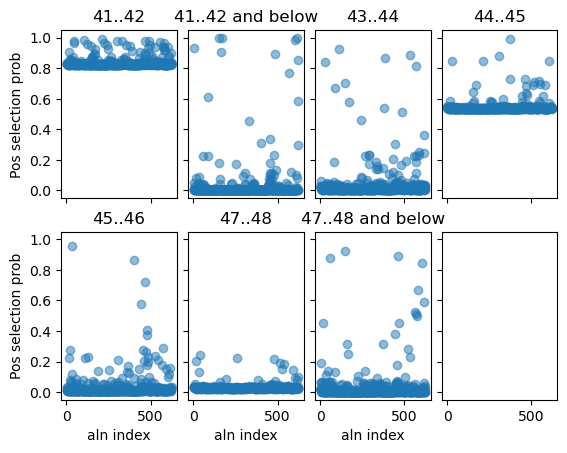

In [6]:
fig, axarr = plt.subplots(2,4, sharex=True, sharey=True)

trees_to_plot = [1,2,3,4,5,6,7]

n_plot = 0

for jj, axarr_col in enumerate(axarr):
    for kk, ax in enumerate(axarr_col):
        if n_plot<len(trees_to_plot):
            tree_ind = trees_to_plot[n_plot]
            ax.scatter(beb_vals[tree_ind].index, beb_vals[tree_ind]['class_2'], alpha=0.5)
            ax.set_title(tree_ids[tree_ind])
            
            if jj == 1: 
                ax.set_xlabel('aln index')
            if kk == 0: 
                ax.set_ylabel('Pos selection prob')
            n_plot = n_plot + 1
        
fig.subplots_adjust(hspace=0.2, wspace=0.1)

Text(0, 0.5, 'Positive selection probability')

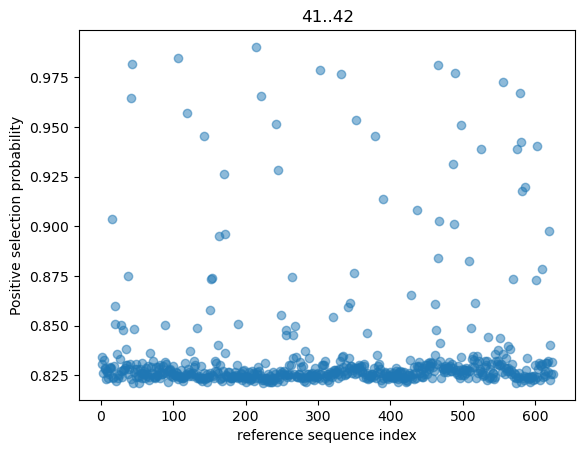

In [7]:
fig, ax = plt.subplots()

tree_ind = 1
ax.scatter(beb_vals[tree_ind].index, beb_vals[tree_ind]['class_2'], alpha=0.5)
ax.set_title(tree_ids[tree_ind])
 
ax.set_xlabel('reference sequence index')
ax.set_ylabel('Positive selection probability')


## For a given Tree, extract residues of interest in terms of both the Ref sequence (usually S. cerevisiae) and Ref Sequence coordinates

In [9]:
tree_no = 8
beb_vals_tree = beb_vals[tree_no]
beb_vals_filt = beb_vals_tree[beb_vals_tree['class_2']>0.90]
residues_of_interest = list(zip(beb_vals_filt.index,beb_vals_filt['ref_AA']))

In [11]:
## Extract SC coordinates with coordinates from the trimmed alignment
og_ref = 'OG1122_REF_Scer_AF-P13711-F1-model_v2'

ref_res_of_int, aln_res_of_int, ref_seq = identify_ref_residue(og_ref, residues_of_interest)
print(ref_res_of_int)
print(aln_res_of_int)


['Y408', 'A418', 'I452', 'F640']
['Y974', 'A984', 'I1022', 'F1229']


In [ ]:
OG4552_REF_Scer_AF-P37299-F1-model_v2 OG4555_REF_Scer_AF-P32799-F1-model_v2

## For a given set of og_ref which have had M1 analysis performed, generate trees to test. 
Also for those trees to test extracts information about the branches - which species and proteins are covered. 


In [17]:
new_etc = {'COX12': 'OG1254_REF_Scer_AF-Q01519-F1-model_v2', 
               'SDH9_SDH1': 'OG1275_REF_Scer_AF-P47052-F1-model_v2',
               'SHH4_SDH4': 'OG1287_REF_Scer_AF-P37298-F1-model_v2',
               'QCR2': 'OG2006_REF_Scer_AF-P07257-F1-model_v2',
               'CYT1': 'OG2248_REF_Scer_AF-P07143-F1-model_v2',
               'SDH2': 'OG2704_REF_Scer_AF-P21801-F1-model_v2',
               'COX6': 'OG2714_REF_Scer_AF-P00427-F1-model_v2',
               'QCR7': 'OG3208_REF_Scer_AF-P00128-F1-model_v2',
               'COX4': 'OG3505_REF_Scer_AF-P04037-F1-model_v2',
               'RIP1': 'OG3575_REF_Scer_AF-P08067-F1-model_v2',
               'COX9': 'OG4118_REF_Scer_AF-P07255-F1-model_v2',
               'QCR6': 'OG4352_REF_Scer_AF-P00127-F1-model_v2',
               'COX8': 'OG4751_REF_Scer_AF-P04039-F1-model_v2',
               'NDI1': 'OG5490_REF_Scer_AF-P32340-F1-model_v2',
               'COX2': 'OG4755_kluyveromyces_marxianus__OG4755__51_759', #MItochondrial, shouldn't have been retained
               'COB': 'OG5006_kluyveromyces_marxianus__OG5006__51_4218'
          }

In [18]:
' '.join(new_etc.values())

'OG1254_REF_Scer_AF-Q01519-F1-model_v2 OG1275_REF_Scer_AF-P47052-F1-model_v2 OG1287_REF_Scer_AF-P37298-F1-model_v2 OG2006_REF_Scer_AF-P07257-F1-model_v2 OG2248_REF_Scer_AF-P07143-F1-model_v2 OG2704_REF_Scer_AF-P21801-F1-model_v2 OG2714_REF_Scer_AF-P00427-F1-model_v2 OG3208_REF_Scer_AF-P00128-F1-model_v2 OG3505_REF_Scer_AF-P04037-F1-model_v2 OG3575_REF_Scer_AF-P08067-F1-model_v2 OG4118_REF_Scer_AF-P07255-F1-model_v2 OG4352_REF_Scer_AF-P00127-F1-model_v2 OG4751_REF_Scer_AF-P04039-F1-model_v2 OG5490_REF_Scer_AF-P32340-F1-model_v2 OG4755_kluyveromyces_marxianus__OG4755__51_759 OG5006_kluyveromyces_marxianus__OG5006__51_4218'

In [15]:
etc_og_refs = {'COX13': 'OG4555_REF_Scer_AF-P32799-F1-model_v2', #ones with higher positive selection and lower conservation
               'COX5A_COX5B': 'OG4316_REF_Scer_AF-P00424-F1-model_v2',
               'COR1': 'OG4150_REF_Scer_AF-P07256-F1-model_v2',
               'COX7': 'OG4346_REF_Scer_AF-P10174-F1-model_v2',
               'QCR8': 'OG4360_REF_Scer_AF-P08525-F1-model_v2',
               'SHH3_SDH3': 'OG2112_REF_Scer_AF-P33421-F1-model_v2',
               'QCR9': 'OG4744_REF_Scer_AF-P22289-F1-model_v2',
               'QCR10': 'OG4552_REF_Scer_AF-P37299-F1-model_v2',
               'COX12': 'OG1254_REF_Scer_AF-Q01519-F1-model_v2', #Others
               'SDH9_SDH1': 'OG1275_REF_Scer_AF-P47052-F1-model_v2',
               'SHH4_SDH4': 'OG1287_REF_Scer_AF-P37298-F1-model_v2',
               'QCR2': 'OG2006_REF_Scer_AF-P07257-F1-model_v2',
               'CYT1': 'OG2248_REF_Scer_AF-P07143-F1-model_v2',
               'SDH2': 'OG2704_REF_Scer_AF-P21801-F1-model_v2',
               'COX6': 'OG2714_REF_Scer_AF-P00427-F1-model_v2',
               'QCR7': 'OG3208_REF_Scer_AF-P00128-F1-model_v2',
               'COX4': 'OG3505_REF_Scer_AF-P04037-F1-model_v2',
               'RIP1': 'OG3575_REF_Scer_AF-P08067-F1-model_v2',
               'COX9': 'OG4118_REF_Scer_AF-P07255-F1-model_v2',
               'QCR6': 'OG4352_REF_Scer_AF-P00127-F1-model_v2',
               'COX8': 'OG4751_REF_Scer_AF-P04039-F1-model_v2',
               'NDI1': 'OG5490_REF_Scer_AF-P32340-F1-model_v2',
               #'COX2': 'OG4755_kluyveromyces_marxianus__OG4755__51_759', #MItochondrial, shouldn't have been retained
               #'COB': 'OG5006_kluyveromyces_marxianus__OG5006__51_4218'
}

In [16]:
dn_ds_thresh = 1.1 
max_branches_to_test = 17



marked_tree_branch_info = {}
hits_tables = {}
branch_leaves = {}

for goi, og_ref in etc_og_refs.items(): 
    print(goi)
    #Load tree with node labels
    m1_rst_fname = base_dir + os.sep + os.path.normpath('selection_calculations/m1/' + og_ref + '/rst')
    tree_node_labels = dyt.load_tree_with_node_labels(m1_rst_fname)

    #Load table of M1 values
    m1_fname = base_dir + os.sep + os.path.normpath('selection_calculations/m1/' + og_ref + '/M1.out')
    dn_ds_table = dyt.load_dn_ds_m1(m1_fname)
    
    #Load map of og names
    og_name_map_fname = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/seq_name_map/' + og_ref + '.tm.tsv')
    og_name_map = pd.read_table(og_name_map_fname)
    
    #Identify Nodes with high DN/DS
    hits_table = dn_ds_table[dn_ds_table['dN/dS']>dn_ds_thresh].sort_values(by='dN/dS', ascending=False)
    print('Total branches above threshold: ' + str(len(hits_table)))
    if len(hits_table)>max_branches_to_test: 
        print('More than ' + str(max_branches_to_test) + ' candidate branches for positive selection, selecting top ' + str(max_branches_to_test) + '. og_ref: ' + og_ref)
        branches_to_test = hits_table.index[0:12]
    else: 
        branches_to_test = hits_table.index

    hits_table = hits_table.loc[branches_to_test] # truncate hits table
    
    nodes_to_label = [branch.split('..')[1] for branch in hits_table.index]
    
    hits_table['labelled_node'] = nodes_to_label
    
    hits_tables[goi] = hits_table

    #Make file with trees labeling the indicated branches
    labeled_trees_fname = base_dir + os.sep + os.path.normpath('selection_calculations/branch_site/trees/' + og_ref + '.bs_trees')

    marked_tree_branch_info_goi = dyt.write_marked_trees(labeled_trees_fname, tree_node_labels, nodes_to_label)
    marked_tree_branch_info[goi] = marked_tree_branch_info_goi
    
    branch_leaves_goi = {}
    for jj, selected_node_name in enumerate(nodes_to_label): 
        tree_no = jj + 1
        branch_leaves_goi[tree_no] = dyt.get_branch_leaves(tree_node_labels, selected_node_name, og_name_map, marked_tree_branch_info_goi)
    branch_leaves[goi] = branch_leaves_goi

COX13
Total branches above threshold: 6
COX5A_COX5B
Total branches above threshold: 10
COR1
Total branches above threshold: 8
COX7
Total branches above threshold: 15
QCR8
Total branches above threshold: 9
SHH3_SDH3
Total branches above threshold: 16
QCR9
Total branches above threshold: 11
QCR10
Total branches above threshold: 11
COX12
Total branches above threshold: 13
SDH9_SDH1
Total branches above threshold: 12
SHH4_SDH4
Total branches above threshold: 14
QCR2
Total branches above threshold: 12
CYT1
Total branches above threshold: 9
SDH2
Total branches above threshold: 10
COX6
Total branches above threshold: 11
QCR7
Total branches above threshold: 17
COX4
Total branches above threshold: 8
RIP1
Total branches above threshold: 10
COX9
Total branches above threshold: 12
QCR6
Total branches above threshold: 8
COX8
Total branches above threshold: 13
NDI1
Total branches above threshold: 4


## Check Branch-Site Analysis results
Branch Site Analysis is then performed on those trees (on cluster) 

Extracts output data from the Branch Site Analysis results.

The output for each protein is a json file 

gene_name: 
    og_ref
    Tree_number: 
        branch_label: 
        labelled_node: 
        branch_site_stats: 
            m1_dnds: dnds value for the indicated branch from the m1 run
            m1_dn: dn value from m1 run
            m1_ds: ds value from m1 run
            mlA: Maximum Likelihood estimator for modelA
            mlAfix1: Maximum Likelihood estimator for modelA_fix1
            bs_stat: statistic for chi2 test, 2*(mlA-mlAfix1)
            sig_flag: If the statistic is above the chi2 threshold         
        site_data: 
            pos_sel_res_paml: identity and index of residues that pass the threshold from the PAML output - residue is from first sequence in alignment and index is from the strict trimming
            pos_sel_res_aln: identity and index of residues that pass the threshold from the alignment
            pos_sel_res_ref: identity and index of residues that pass the threshold from the reference protein from the alignment (usually SC)
            beb_score: beb score for residues that pass the threshold.  
        leaf_data: 
            leaves_short: a list of proteins (abbreviated name)
            leaves_long:  a list of proteins (full name)
            specs_unique: a list of species  
            paralogs_flag: true if there are paralogs in that branch

In [60]:
chi2_thresh = 3.84  # Chi2 with 50:50 mixture of point mass 0 has critical values of 5% at 2.71 and 5.41 at 1%.   (page 30 of manual)
                    # Normal Chi2 has critical values 3.84 and 5.99 this is what they recommend
                    # Would also need to do Multiple Hypothesis test

beb_val_thresh = 0.95 #Bayes Empirical value for probability that a residue is positively selected.  Sometimes this value has a high baseline.  

bs_analysis_data = {
            'chi2_thresh': chi2_thresh,
            'beb_val_thresh': beb_val_thresh
}


for goi, og_ref in etc_og_refs.items(): 
    print(goi)
    bs_analysis_data_goi = {}
    og_ref = etc_og_refs[goi]

    bs_rst_file = base_dir + os.sep + os.path.normpath('selection_calculations/branch_site/' + og_ref + '/A/rst')
    beb_vals = extract_beb_values(bs_rst_file)

    bsa_dir = base_dir + os.sep + os.path.normpath('selection_calculations/branch_site/' + og_ref)

    #def BS_comparison(bsa_dir)
    #Output:  Dictionary for each tree that contains MSA, MSA_fix1, Difference, and whether it passes the threshold

    bsa_fname = bsa_dir + os.sep + os.path.normpath('A/BSA.out')

    ml_data_A = extract_ML_est_BS(bsa_fname)

    bsafix1_fname = bsa_dir + os.sep + os.path.normpath('Afix1/BSAfix1.out')
    ml_data_Afix1 = extract_ML_est_BS(bsafix1_fname)


    for jj, (tree_no, ml_data_A_tree) in enumerate(ml_data_A.items()):
        mlA = ml_data_A_tree[0]
        mlAfix1 = ml_data_Afix1[tree_no][0]
        bs_analysis_data_goi[tree_no] = {'branch_site_stats': 
                                               {
                                                   'mlA': mlA, 
                                                   'mlAfix1': mlAfix1,
                                                   'bs_stat': 2*(mlA-mlAfix1),
                                                   'sig_flag': 2*(mlA-mlAfix1)>chi2_thresh
                                               }
                                        }

    for jj, (branch, row) in enumerate(hits_tables[goi].iterrows()): 
        tree_no = jj+1
        bs_analysis_data_goi[tree_no]['branch_label'] = branch
        bs_analysis_data_goi[tree_no]['labelled_node'] = row['labelled_node']
        bs_analysis_data_goi[tree_no]['branch_site_stats']['m1_dnds'] = row['dN/dS']
        bs_analysis_data_goi[tree_no]['branch_site_stats']['m1_dn'] = row['dN']
        bs_analysis_data_goi[tree_no]['branch_site_stats']['m1_ds'] = row['dS']

    #For each tree add leaf data from bs_analysis_data_goi and extract beb values to identify residues of interest
    for tree_no, branch_leaves_tree in branch_leaves[goi].items():
        bs_analysis_data_goi[tree_no]['leaf_data'] = branch_leaves_tree

        beb_vals_tree = beb_vals[tree_no]
        beb_vals_filt = beb_vals_tree[beb_vals_tree['class_2']>beb_val_thresh]
        residues_of_interest = list(zip(beb_vals_filt.index,beb_vals_filt['ref_AA']))
        pos_sel_res_ref, pos_sel_res_aln, ref_seq = identify_ref_residue(og_ref, residues_of_interest)

        bs_analysis_data_goi[tree_no]['site_data'] = {
              'pos_sel_res_paml': [ind_res[1] + str(ind_res[0]) for ind_res in residues_of_interest], ####
              'pos_sel_res_aln': pos_sel_res_aln,
              'pos_sel_res_ref': pos_sel_res_ref,
              'beb_score': list(beb_vals_filt['class_2'])
            }
        
    bs_analysis_data[goi] = bs_analysis_data_goi

## Get list of ETC Proteins

From pathways: aerobic respiration, electron transport chain

Cytochrome C oxidase: 
Cox13, 12, 9, 8, 7, 6, 5A, 4, 3, 2, 1
COB (Mito), RIP1, CYT1, COR1, QCR22, QCR6, QCR7, QCR8, QCR9, QCR10

Succinate Dehydrogenase: 
SDH4, 3, 2, SDH9 , SDH1

YJL045W is the gene name of SDH9 and is what was listed

NADH Dehydrogenase
NDI1
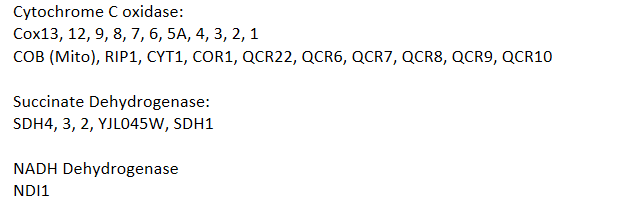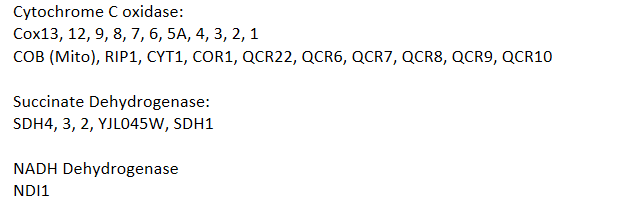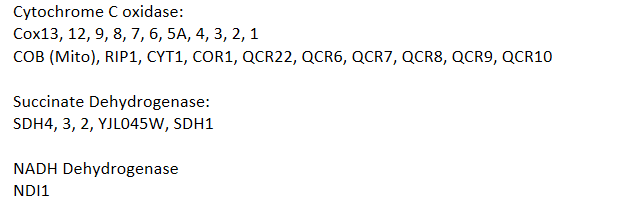

In [54]:
etc_pathways_list = {'cytochrome c oxidase': ['COX1', 'COX2', 'COX3', 'COX4', 'COX5A', 'COX6', 'COX7', 'COX8', 'COX9', 'COX12', 'COX13'],
                 'ubiquinol cytochrome b reductase': ['COB', 'RIP1', 'CYT1', 'COR1', 'QCR2', 'QCR6', 'QCR7', 'QCR8', 'QCR9', 'QCR10'],
                 'succinate dehydrogenase': ['SDH4', 'SDH3', 'SDH2', 'SDH9', 'SDH1'], #SDH3 and #SDH9was not present in my version of the SGD name lookup
                 'NAD dehydrogenase': ['NDI1']
                }

mito_list = ['COB', 'COX1', 'COX2', 'COX3']

paralog_pairs = [('COX5B','COX5A'), ('SHH3','SDH3'),('SDH9', 'SDH1'),('SHH4','SDH4')]

paralog_lookup = {}
for p1,p2 in paralog_pairs: 
    paralog_lookup[p1] = p2
for p1,p2 in paralog_pairs: 
    paralog_lookup[p2] = p1

og_fname = base_dir + os.sep + os.path.normpath('selected_proteins/og_metadata.json')
with open(og_fname, 'r') as f:
    og_metadata = json.load(f) 

model_og_lookup = dyt.load_model_og_lookup()


etc_name_list = []
for enzyme, name_list in etc_pathways_list.items(): 
    etc_name_list = etc_name_list + name_list

etc_name_list = etc_name_list + [paralog for paralog in paralog_lookup.keys()]
etc_name_list = list(set(etc_name_list))
etc_orf_list = yeast_esr_exp.SC_orf_lookup_by_name(etc_name_list)

newer_genes = {'SDH3': 'YKL141W',
               'SDH9': 'YJL045W'
              }

etc_orf_list_updated = []
for orf in etc_orf_list: 
    if orf in newer_genes.keys(): 
        etc_orf_list_updated.append(newer_genes[orf])
    else: 
        etc_orf_list_updated.append(orf)     

etc_og_list = [model_og_lookup['Scer'][gene_id] for gene_id in etc_orf_list_updated]

paralogs_col =[]
for name in etc_name_list: 
    if name in paralog_lookup.keys():
        paralogs_col.append(paralog_lookup[name])
    else: 
        paralogs_col.append(None)

#Check if the OG was selected
og_retained = []
for og in etc_og_list: 
    og_data = og_metadata[og]
    if og_data['pass_species_filter']: 
        og_retained.append(True)
    else: 
        og_retained.append(False)
        
#mitochondrial
mitochondrial = []
for gene_id in etc_orf_list_updated: 
    if gene_id[0]=='Q': 
        mitochondrial.append(True)
    else: 
        mitochondrial.append(False)
        
etc_proteins_df = pd.DataFrame.from_dict( {'name': etc_name_list, 
                         'gene_id': etc_orf_list_updated,
                         'og': etc_og_list, 
                         'paralog': paralogs_col,
                         'og_retained': og_retained, 
                         'mitochondrial': mitochondrial
                        })

#Check if any of these break apart in clusters and identify appropriate og_ref id
cluster_table = pd.read_csv(base_dir + os.sep + os.path.normpath('msas/structural/tm_align/clustering/cluster_mapping.csv'))
cluster_table['og'] = [og_clust.split('_')[0] for og_clust in cluster_table['og_clust']]
cluster_table_subset = cluster_table[(cluster_table['cluster_rep']==1) & (cluster_table['og'].isin(etc_proteins_df['og']))]

etc_proteins_clustered = cluster_table_subset.merge(etc_proteins_df, how='outer', on='og').loc[:,['primary_id', 'og_clust', 'og', 'name', 'gene_id', 'paralog', 'og_retained', 'no_sc', 'mitochondrial']]

#assign enzyme_name

enzyme_lookup = {}
for enzyme, gene_list in etc_pathways_list.items(): 
    for gene in gene_list: 
        enzyme_lookup[gene] = enzyme
        
#assigns enzyme name to match paralog
for p1,p2 in paralog_lookup.items(): 
    if not(p1) in enzyme_lookup.keys(): 
        enzyme_lookup[p1] = enzyme_lookup[p2]

enzyme_col = []
for name in etc_proteins_clustered['name']: 
    if name in enzyme_lookup.keys(): 
        enzyme_col.append(enzyme_lookup[name])
    else: 
        enzyme_col.append(None)
        
etc_proteins_clustered['enzyme'] = enzyme_col

etc_proteins_clustered = etc_proteins_clustered.merge(struct_data_dnds.loc[:,['og_ref', 'Mean(Conservation rate AA)', 'Mean(Mapping rate)', 'dN_dS_struct_m0']], how='left', left_on='primary_id', right_on='og_ref')

etc_proteins_clustered.to_csv(base_dir + os.sep + os.path.normpath('examples/etc/etc_table.csv'))

S.Cer orf for SDH9not found


In [66]:
#Visualize Trees for a list 


#species_table = pd.read_csv(base_dir + os.sep + 'species_selection.csv')
#species_table_short = species_table.loc[species_table['Load']=='Y', ['original_genome_id', 'jacobs_name']]
#spec_time_tree_2_orig = dict(zip(species_table_short['jacobs_name'], species_table_short['original_genome_id']))

#out_image_dir = base_dir + os.sep + 'og_sequences' + os.sep + 'cluster_trees' + os.sep


tree_dir = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/trees')
out_image_dir = base_dir + os.sep + os.path.normpath('selection_calculations/tree_images')

for set_name, og_ref_list in og_refs.items():
    for og_ref in og_ref_list: #og = 'OG1004'

        fname_tree = tree_dir + os.sep + og_ref + '.tm.fasta.clipkit.treefile'
        t = Tree(fname_tree, format=1)  
        # ts = TreeStyle()
        # ts.show_leaf_name = False
        # ts.show_branch_length = True

        #     red_node = NodeStyle()
        #     red_node['bgcolor'] = 'red'

        #     blue_node = NodeStyle()
        #     blue_node['bgcolor']= 'LightSteelBlue'


        #     for node in t.traverse(): 
        #         if node.is_leaf():
        #             (spec_time_tree, y1000_id) = node.name.split('|')
        #             spec_orig = spec_time_tree_2_orig[spec_time_tree]
        #             if spec_orig in ['saccharomyces_cerevisiae', 'candida_albicans', 'schizosaccaromyces_pombe']:  #probably none in Pombe
        #                 print(node.name)
        #             else:
        #                 new_name = spec_orig + '__' + og + '__' + y1000_id

        #                 if new_name in cluster_names_og['C1']:
        #                     node.set_style(blue_node)
        #                 elif new_name in cluster_names_og['C2']: 
        #                     node.set_style(red_node)

        #                 node.name = new_name
        #                 name_face = AttrFace("name",fsize=20)
        #                 node.add_face(name_face, column=0, position="branch-right") 
        #                 #convert name to primary id

        t.ladderize()
        #t.render('%%inline') #, tree_style=ts)
        t.render(out_image_dir + os.sep + set_name + os.sep + og_ref + '.pdf')  #, tree_style=ts)

In [69]:

#Visualize omega for different trees

tree = '(OG4552_0 #0.033234 , (((((((OG4552_1 #1.19967 , OG4552_11 #0.00897308 ) #999 , OG4552_8 #0.0324229 ) #0.0411581 , (OG4552_9 #0.0304342 , OG4552_14 #2.49748 ) #0.0499443 ) #999 , OG4552_16 #0.216552 ) #1.89263 , (OG4552_10 #1.28001 , OG4552_12 #0.149252 ) #0.0694185 ) #999 , (((OG4552_2 #0.00914513 , OG4552_3 #0.212349 ) #999 , OG4552_13 #0.29135 ) #0.326615 , (OG4552_6 #0.203667 , OG4552_15 #0.36552 ) #1.42919 ) #999 ) #999 , (OG4552_4 #0.354171 , OG4552_7 #0.117535 ) #0.472012 ) #0.383123 , OG4552_5 #0.240703 );'
t = Tree(tree, format=1)

In [22]:
etc_orf_list

['YDR529C',
 'Q0045',
 'YOR065W',
 'YMR118C',
 'YPR191W',
 'YLR395C',
 'YLL041C',
 'YMR256C',
 'YJL166W',
 'YEL024W',
 'YDL067C',
 'YNL052W',
 'YGL187C',
 'YHR001W-A',
 'Q0250',
 'YBL045C',
 'Q0275',
 'YGL191W',
 'Q0105',
 'YIL111W',
 'YFR033C',
 'YKL141W',
 'YGR183C',
 'YLR038C',
 'YJL045W',
 'YLR164W',
 'YDR178W',
 'YML120C',
 'YKL148C',
 'YHR051W']

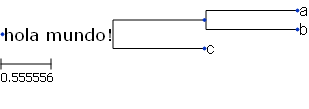

In [4]:
t = Tree( "((a,b),c);" )

# Basic tree style
ts = TreeStyle()
ts.show_leaf_name = True

# Add two text faces to different columns
t.add_face(TextFace("hola "), column=0, position = "branch-right")
t.add_face(TextFace("mundo!"), column=1, position = "branch-right")
t.render('%%inline')

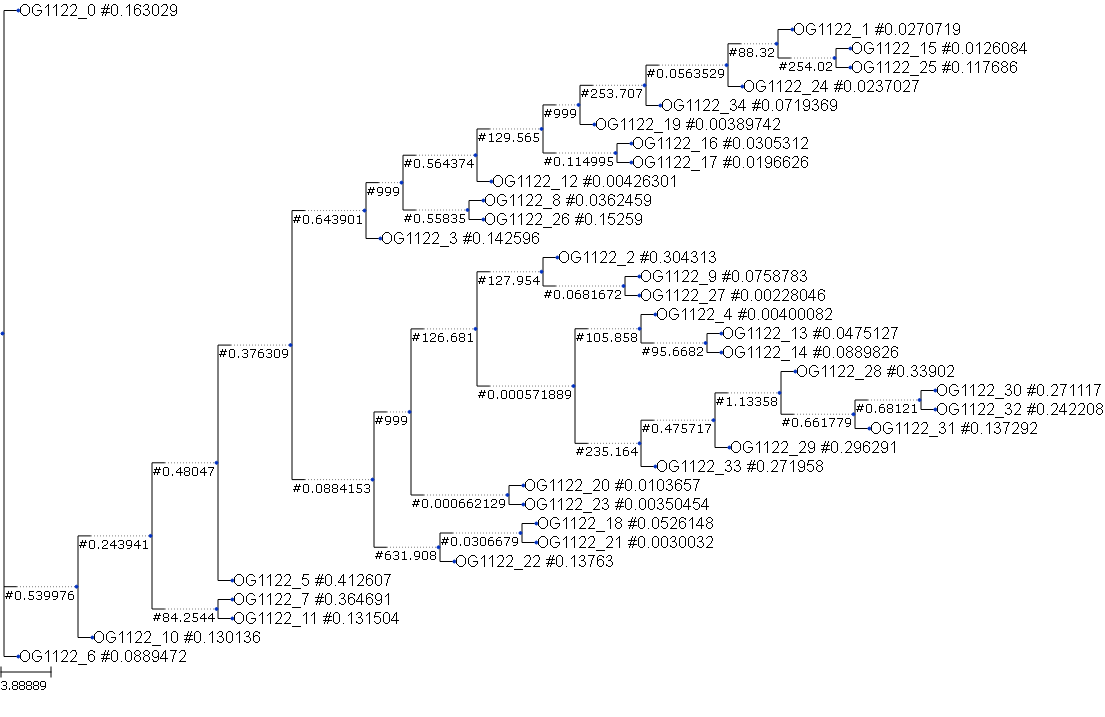

In [4]:
tree = '(OG1122_0 #0.163029 , ((((((((((((OG1122_1 #0.0270719 , (OG1122_15 #0.0126084 , OG1122_25 #0.117686 ) #254.02 ) #88.32 , OG1122_24 #0.0237027 ) #0.0563529 , OG1122_34 #0.0719369 ) #253.707 , OG1122_19 #0.00389742 ) #999 , (OG1122_16 #0.0305312 , OG1122_17 #0.0196626 ) #0.114995 ) #129.565 , OG1122_12 #0.00426301 ) #0.564374 , (OG1122_8 #0.0362459 , OG1122_26 #0.15259 ) #0.55835 ) #999 , OG1122_3 #0.142596 ) #0.643901 , ((((OG1122_2 #0.304313 , (OG1122_9 #0.0758783 , OG1122_27 #0.00228046 ) #0.0681672 ) #127.954 , ((OG1122_4 #0.00400082 , (OG1122_13 #0.0475127 , OG1122_14 #0.0889826 ) #95.6682 ) #105.858 , (((OG1122_28 #0.33902 , ((OG1122_30 #0.271117 , OG1122_32 #0.242208 ) #0.68121 , OG1122_31 #0.137292 ) #0.661779 ) #1.13358 , OG1122_29 #0.296291 ) #0.475717 , OG1122_33 #0.271958 ) #235.164 ) #0.000571889 ) #126.681 , (OG1122_20 #0.0103657 , OG1122_23 #0.00350454 ) #0.000662129 ) #999 , ((OG1122_18 #0.0526148 , OG1122_21 #0.0030032 ) #0.0306679 , OG1122_22 #0.13763 ) #631.908 ) #0.0884153 ) #0.376309 , OG1122_5 #0.412607 ) #0.48047 , (OG1122_7 #0.364691 , OG1122_11 #0.131504 ) #84.2544 ) #0.243941 , OG1122_10 #0.130136 ) #0.539976 , OG1122_6 #0.0889472 );' 
#'(OG4552_0 #0.033234 , (((((((OG4552_1 #1.19967 , OG4552_11 #0.00897308 ) #999 , OG4552_8 #0.0324229 ) #0.0411581 , (OG4552_9 #0.0304342 , OG4552_14 #2.49748 ) #0.0499443 ) #999 , OG4552_16 #0.216552 ) #1.89263 , (OG4552_10 #1.28001 , OG4552_12 #0.149252 ) #0.0694185 ) #999 , (((OG4552_2 #0.00914513 , OG4552_3 #0.212349 ) #999 , OG4552_13 #0.29135 ) #0.326615 , (OG4552_6 #0.203667 , OG4552_15 #0.36552 ) #1.42919 ) #999 ) #999 , (OG4552_4 #0.354171 , OG4552_7 #0.117535 ) #0.472012 ) #0.383123 , OG4552_5 #0.240703 );'
#'(OG4555_0 #0.371144 , (((((((OG4555_1 #0.0401007 , OG4555_14 #193.338 ) #0.0206283 , OG4555_9 #0.278729 ) #0.308471 , OG4555_15 #0.133923 ) #0.39652 , (((OG4555_2 #0.0396629 , OG4555_13 #0.00242407 ) #0.0216605 , (((OG4555_3 #0.0430765 , OG4555_11 #0.0430739 ) #0.170912 , OG4555_8 #0.416276 ) #388.26 , OG4555_4 #0.782766 ) #499.349 ) #1.62161 , (OG4555_16 #0.0438976 , OG4555_17 #0.538332 ) #329.962 ) #0.0414763 ) #339.207 , OG4555_7 #0.0748496 ) #0.148236 , (OG4555_10 #0.111478 , OG4555_12 #0.162628 ) #1.00136 ) #0.548781 , OG4555_6 #0.441593 ) #0.198348 , OG4555_5 #0.0503427 );'
t = Tree(tree, format=1)
for node in t.traverse():
    if not(node.is_leaf()):
        node.add_face(TextFace(node.name, fsize=8), column=0, position='branch-bottom')
t.ladderize
t.render('%%inline')

In [5]:
t.write(format=9)

'(OG1122_0 #0.163029,((((((((((((OG1122_1 #0.0270719,(OG1122_15 #0.0126084,OG1122_25 #0.117686)),OG1122_24 #0.0237027),OG1122_34 #0.0719369),OG1122_19 #0.00389742),(OG1122_16 #0.0305312,OG1122_17 #0.0196626)),OG1122_12 #0.00426301),(OG1122_8 #0.0362459,OG1122_26 #0.15259)),OG1122_3 #0.142596),((((OG1122_2 #0.304313,(OG1122_9 #0.0758783,OG1122_27 #0.00228046)),((OG1122_4 #0.00400082,(OG1122_13 #0.0475127,OG1122_14 #0.0889826)),(((OG1122_28 #0.33902,((OG1122_30 #0.271117,OG1122_32 #0.242208),OG1122_31 #0.137292)),OG1122_29 #0.296291),OG1122_33 #0.271958))),(OG1122_20 #0.0103657,OG1122_23 #0.00350454)),((OG1122_18 #0.0526148,OG1122_21 #0.0030032),OG1122_22 #0.13763))),OG1122_5 #0.412607),(OG1122_7 #0.364691,OG1122_11 #0.131504)),OG1122_10 #0.130136),OG1122_6 #0.0889472);'

In [ ]:
tree_dir = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/trees')
out_image_dir = base_dir + os.sep + os.path.normpath('selection_calculations/tree_images')

tree_spec = 'OG4555_REF_Scer_AF-P32799-F1-model_v2.tm.fasta.clipkit.treefile'

In [6]:
tree = '(OG1122_0:0.08390,((((((((((((OG1122_1:0.22175,(OG1122_15:0.38094,OG1122_25:0.29127)95.3/97:0.07751)89.9/92:0.06258,OG1122_24:0.19383)6.7/59:0.02964,OG1122_34:0.31840)98.7/99:0.11658,OG1122_19:0.44397)88.9/93:0.05919,(OG1122_16:0.13907,OG1122_17:0.15364)100/100:0.28783)94.8/95:0.15396,OG1122_12:0.44500)100/100:0.54075,(OG1122_8:0.26859,OG1122_26:0.36227)100/100:0.49154)99.8/100:0.34900,OG1122_3:1.01773)96.6/97:0.23697,((((OG1122_2:0.62253,(OG1122_9:1.16411,OG1122_27:0.53277)91.5/81:0.14776)76.5/33:0.08702,((OG1122_4:1.11254,(OG1122_13:0.61855,OG1122_14:0.29524)99.1/100:0.18734)28.9/59:0.09258,(((OG1122_28:0.78338,((OG1122_30:0.24625,OG1122_32:0.41652)90.7/98:0.07659,OG1122_31:0.46336)96.8/98:0.11894)90.9/74:0.08752,OG1122_29:0.29594)85.9/73:0.06952,OG1122_33:0.57181)98/98:0.12384)95/83:0.10720)33.3/30:0.08133,(OG1122_20:0.45962,OG1122_23:0.96559)95.7/89:0.16852)100/100:0.89360,((OG1122_18:0.49362,OG1122_21:0.76395)81/94:0.09814,OG1122_22:0.55986)86.7/94:0.08239)63.3/60:0.08833)98.8/100:0.20573,OG1122_5:0.95026)99.1/100:0.16919,(OG1122_7:0.72969,OG1122_11:0.46483)73.1/65:0.08079)97.6/71:0.11136,OG1122_10:0.28690)100/100:0.25355,OG1122_6:0.09211):0.00000;' 
#'(OG4552_0:0.01146,(((((((OG4552_1:1.18774,OG4552_11:0.10278)54.3/37:0.03944,OG4552_8:0.37053)90.4/52:0.11541,(OG4552_9:0.48833,OG4552_14:0.31995)0/24:0.02204)74.4/41:0.08321,OG4552_16:0.14439)92.8/54:0.17278,(OG4552_10:0.44168,OG4552_12:0.32420)55.3/45:0.17703)50.5/28:0.10870,(((OG4552_2:1.16055,OG4552_3:0.48197)84.2/58:0.42301,OG4552_13:0.18740)91.7/44:0.24718,(OG4552_6:0.31351,OG4552_15:0.16489)42.5/67:0.09350)67.5/33:0.13000)92.9/39:0.18686,(OG4552_4:0.54684,OG4552_7:0.10904)71.2/58:0.07545)97.3/92:0.22923,OG4552_5:0.05663):0.00000;'
#5441: '(OG5441_0:0.61252,((((((OG5441_1:1.56251,OG5441_2:1.99194)24.5/53:0.24381,OG5441_10:1.64470)99.2/98:0.49906,((OG5441_3:0.66598,(OG5441_15:1.32214,OG5441_16:0.27522)98.9/100:0.53414)58/57:0.13056,OG5441_4:0.61813)85.1/75:0.12582)99.6/99:0.32387,(OG5441_9:0.57583,OG5441_12:0.57562)95.6/97:0.15332)97.2/88:0.15321,(OG5441_5:0.68807,OG5441_11:0.80087)65.4/40:0.08622)86.5/41:0.05874,(OG5441_6:0.43659,(OG5441_13:0.35573,OG5441_14:0.21207)100/100:0.37612)98.9/99:0.20436)45.7/44:0.06259,(OG5441_7:0.42592,OG5441_8:0.42647)100/100:0.40933):0.00000;'
#tree = '(1, (((((((2, 15), 10), 16), (((3, 14), (((4, 12), 9), 5)), (17, 18))), 8), (11, 13)), 7), 6);'

t = Tree(tree, format=1)
t.write(format=9)
#t_no_branch = EvolTree(t.write(format=9))
t.mark_tree(['2','15','10','16'], ['#1','#1','#1','#1'])

'(OG1122_0,((((((((((((OG1122_1,(OG1122_15,OG1122_25)),OG1122_24),OG1122_34),OG1122_19),(OG1122_16,OG1122_17)),OG1122_12),(OG1122_8,OG1122_26)),OG1122_3),((((OG1122_2,(OG1122_9,OG1122_27)),((OG1122_4,(OG1122_13,OG1122_14)),(((OG1122_28,((OG1122_30,OG1122_32),OG1122_31)),OG1122_29),OG1122_33))),(OG1122_20,OG1122_23)),((OG1122_18,OG1122_21),OG1122_22))),OG1122_5),(OG1122_7,OG1122_11)),OG1122_10),OG1122_6);'

In [44]:
print(t_no_branch)


   /-OG4552_0
  |
  |                     /-OG4552_1
  |                  /-|
  |               /-|   \-OG4552_11
  |              |  |
  |            /-|   \-OG4552_8
  |           |  |
  |           |  |   /-OG4552_9
  |         /-|   \-|
  |        |  |      \-OG4552_14
  |        |  |
  |      /-|   \-OG4552_16
  |     |  |
  |     |  |   /-OG4552_10
  |     |   \-|
--|     |      \-OG4552_12
  |   /-|
  |  |  |         /-OG4552_2
  |  |  |      /-|
  |  |  |   /-|   \-OG4552_3
  |  |  |  |  |
  |  |   \-|   \-OG4552_13
  |--|     |
  |  |     |   /-OG4552_6
  |  |      \-|
  |  |         \-OG4552_15
  |  |
  |  |   /-OG4552_4
  |   \-|
  |      \-OG4552_7
  |
   \-OG4552_5


In [56]:
### To Load Tree in Jalview, the name needs to match the alignment.  The alignment has all these other items in it

og_ref = 'OG1122_REF_Scer_AF-P13711-F1-model_v2'
orig_aln_fname = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/fasta_renamed/' + og_ref + '.tm.fasta')
jalview_aln_fname = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/fasta_renamed_jalview/' + og_ref + '.tm.fasta')

orig_aln = SeqIO.parse(orig_aln_fname, 'fasta')

with open(jalview_aln_fname,'w') as f_out:
    for record in orig_aln: 
        f_out.write('>' + record.id + '\n')
        f_out.write(str(record.seq) + '\n')
    